# III : Daegu Apartment **(Price Prediction)**

# 1. Business Problem Understanding

> Context

Apartemen merupakan solusi utama bagi masyarakat di Daegu untuk memenuhi kebutuhan hunian, mengingat keterbatasan lahan dan tingginya harga tanah di kota tersebut. Dengan populasi sekitar 2,5 juta jiwa dan tren urbanisasi yang terus meningkat, permintaan terhadap apartemen tetap tinggi.

Cara bisnis apartemen ini bekerja adalah dengan menyewakan atau menjual unit apartemen kepada masyarakat. Selain itu, ada juga layanan tambahan seperti pengelolaan fasilitas di apartemen, misalnya keamanan, kebersihan, dan tempat parkir.

Apartemen di Daegu punya banyak keuntungan. Lokasinya strategis, seperti dekat dengan kantor, transportasi umum, atau pusat perbelanjaan. Selain itu, harganya lebih terjangkau dibandingkan membeli rumah, dan fasilitasnya cukup lengkap.

Untuk memasarkan apartemen, biasanya perusahaan menggunakan media online seperti situs properti, bekerja sama dengan agen properti, atau mengadakan pameran. Orang-orang yang paling sering menjadi pelanggan adalah pekerja kantoran, pelajar, atau keluarga muda yang mencari tempat tinggal praktis dan modern.

Meskipun bisnis ini punya banyak peluang karena kebutuhan akan apartemen terus meningkat, ada juga tantangannya, yaitu sulit menentukan harga yang sesuai agar bisa bersaing dengan pasar.

[Statista](https://www.statista.com/statistics/1303257/south-korea-apartments-in-daegu-by-number-of-stories/#:~:text=In%202022%2C%20the%20total%20number%20of%20apartment,Daegu%2C%20South%20Korea%2C%20amounted%20to%20approximately%20239000.)

[Wikipedia](https://ms.wikipedia.org/wiki/Daegu#:~:text=Daegu%20atau%20Taegu%20atau%20Kota,ketiga%20terbesar%20di%20Korea%20Selatan.)

> Problem Statement

Agen properti di kota **Daegu**, salah satu kota besar di **Korea**, menghadapi tantangan dalam menentukan harga sewa apartemen yang sesuai dengan harga pasar, Kesalahan dalam penentuan harga dapat menyebabkan berbagai masalah, seperti sulit mendapatkan pelanggan karena harganya terlalu tinggi, atau kehilangan keuntungan yang maksimal jika harga terlalu rendah. 

Harga sewa apartemen dipengaruhi oleh berbagai faktor, seperti ukuran apartemen, fasilitas yang tersedia, akses transportasi, dan kondisi pasar lokal, Tanpa alat bantu yang akurat, agen properti sering kali hanya mengandalkan estimasi harga dengan cara manual yang kurang akurat.
  
Oleh karena itu agen properti membutuhkan model**Machine Learning (ML)** yang dapat memprediksi harga sewa apartemen secara akurat, model ini juga akan membantu agen properti dalam menentukan harga yang tepat.

Tujuan dalam menggunakan model **Machine Learning (ML)** adalah :

1. Membantu agen properti dan pemilik apartemen dalam membuat keputusan seperti menentukan harga yang optimal berdasarkan tipe dan lokasi apartemen.
2. Mencegah kerugian yang besar akibat penentuan harga yang tidak sesuai, baik dari harga yang terlalu tinggi, maupun harga yang rendah 
3. Menghemat tenaga dan juga waktu untuk agen properti.


> Analytich approach

Dalam proyek ini, kita akan menganalisis data apartemen di Daegu untuk menemukan pola yang membedakan satu unit apartemen dengan yang lainnya.

Setelah memahami pola dalam data, kita akan menggunakan model regresi, yaitu metode dalam Machine Learning yang dapat memprediksi harga apartemen berdasarkan faktor-faktor seperti ukuran, fasilitas, dan akses transportasi.

> Metric Evaluation

karena tujuan utama dalam proyek ini adalah memprediksi harga apartemen (berupa mata uang), maka kita akan menggunakan model regresi, dan metrik yang difokuskan ialah antara**MAE, dan MAPE** karena metrik tersebut cocok digunakan untuk yang tujuannya prediksi harga (mata uang) yaitu **MAE, dan MAPE**:

Metrik yang difokuskan : 
- **MAE** *(Mean Absolute Error)* : mengukur rata-rata selisih absolut dari error, jadi **MAE** akan memberikan seberapa besar kesalahan prediksi model, dan mudah untuk diinterpretasikan 
- **MAPE** *(Mean Absolute Percentage Error)* : mengukur rata-rata selisih absolut dari error dalam persentase, jadi **MAPE**  akan memberikan seberapa besar kesalahan prediksi model dalam bentuk persentase, sehingga bisa lebih mudah difahami terutama oleh orang awam
* Semakin kecil nilai **MAE, MAPE** maka model semakin baik dalam memprediksi harga.


#alasan tidak menggunakan **MSE RMSE R2**, karena ketiga metrik tersebut tidak cocok apabila variabel dependent (tujuannya) berupa mata uang#

Metrik yang tidak difokuskan
- MSE dan RMSE : 
    - MSE menghitung rata rata kuadrat error, dan RMSE akar dari MSE 
    - karena errornya di kuadratkan, maka akan sulit diinterpretasikan jika tujuannya (berupa mata uang)
    - MSE dan RMSE juga sensitif terhadap outlier 
- R2 : 
    - R2 itu menunjukan seberapa baik model menjelaskan variasi datanya, tapi tidak memberikan seberapa besar kesalahan prediksi dalam suatu harga.

karena dalam proyek ini tujuannya memprediksi harga (berupa mata uang), maka tidak cocok apabila difokuskan kepada metrik **MSE RMSE R2**

# 2. Data Understanding

1. Jumlah data = 4123 baris dengan 11 kolom

2. kolom - kolom :

|**Kolom**|**Tipe**|**Pengertian**|
|---|---|---|
|HallwayType| object | Tipe apartment
|TimeToSubway| object | Waktu yang dibutuhkan ke stasiun kereta bawah tanah terdekat
|SubwayStation| object | Nama stasiun kereta bawah tanah terdekat
|N_FacilitiesNearBy(ETC)| float64 | Jumlah fasilitas terdekat
|N_FacilitiesNearBy(PublicOffice)| float64 | Jumlah fasilitas perkantoran umum terdekat
|N_SchoolNearBy(University)| float64 | Jumlah universitas terdekat
|N_Parkinglot(Basement)| float64 | Nomor tempat parkir
|YearBuilt| int64 | Tahun apartemen dibangun
|N_FacilitiesInApt| int64 | Jumlah fasilitas yang ada di apartemen
|Size(sqft)| int64 | Ukuran apartemen (dalam kaki persegi)
|SalePrice| int64 | Harga apartemen (won)

# 3. Data Preparation

In [269]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display
from scipy.stats import normaltest
import phik
from phik.report import plot_correlation_matrix
from phik import report
from IPython.display import display
from scipy.stats import shapiro

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

# Model Selection

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error
import time

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
import missingno as msno

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

## 3.1. Load dataset

In [270]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [271]:
df = pd.read_csv("data_daegu_apartment.csv")
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


## 3.2.Data Cleaning

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


### A. Handle Duplicate

In [273]:
df.duplicated().sum()

1422

In [274]:
df.duplicated().sum()/len(df)*100

34.48944943002668

In [275]:
df[
    (df["HallwayType"]=="terraced")&(df["TimeToSubway"]=="0-5min")
    &(df["SubwayStation"]=="Kyungbuk_uni_hospital")&(df["N_FacilitiesNearBy(ETC)"]==0.0)
    &(df["N_FacilitiesNearBy(PublicOffice)"]==5.0)&(df["N_SchoolNearBy(University)"]==3.0)
    &(df["N_Parkinglot(Basement)"]==930.0)&(df["YearBuilt"]==2013)&(df["N_FacilitiesInApt"]==7)
    &(df["Size(sqf)"]==910)&(df["SalePrice"]==263345)
    ]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
18,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
790,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
1396,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
1970,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
2286,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345


In [276]:
df[
    (df["HallwayType"]=="terraced")&(df["TimeToSubway"]=="0-5min")
    &(df["SubwayStation"]=="Banwoldang")&(df["N_FacilitiesNearBy(ETC)"]==0.0)
    &(df["N_FacilitiesNearBy(PublicOffice)"]==0.0)&(df["N_SchoolNearBy(University)"]==0.0)
    &(df["N_Parkinglot(Basement)"]==203.0)&(df["YearBuilt"]==2014)&(df["N_FacilitiesInApt"]==10)
    &(df["Size(sqf)"]==914)&(df["SalePrice"]==371681)
    ]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
26,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
1275,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
1486,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
3295,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681


In [277]:
df.shape

(4123, 11)

In [278]:
df.drop_duplicates(inplace=True,keep="first")

- data yang berupa duplikat tidak terlalu banyak, jadi sebaiknya dihapus, karena akan mengganggu keakuratan pada model machine learning 

In [279]:
df.shape

(2701, 11)

### B. Check Missing Value

In [280]:
df.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

- tidak ada missing values untuk data ini

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       2701 non-null   object 
 1   TimeToSubway                      2701 non-null   object 
 2   SubwayStation                     2701 non-null   object 
 3   N_FacilitiesNearBy(ETC)           2701 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   float64
 5   N_SchoolNearBy(University)        2701 non-null   float64
 6   N_Parkinglot(Basement)            2701 non-null   float64
 7   YearBuilt                         2701 non-null   int64  
 8   N_FacilitiesInApt                 2701 non-null   int64  
 9   Size(sqf)                         2701 non-null   int64  
 10  SalePrice                         2701 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 253.2+ KB


### C. Optimizing Column Hallway Type

In [282]:
pd.set_option('display.max_colwidth',1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel_uniq = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel_uniq

,Column Name,Number of Unique,Unique Sample
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


In [283]:
tabel_uniq[tabel_uniq["Column Name"]=="TimeToSubway"]

,Column Name,Number of Unique,Unique Sample
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"


- mengubah isi kolom TimeToSubway yang asalnya 

0-5min, 10min~15min, 15min~20min, 5min~10min -> menjadi 0~5min, 10min~15min, 15min~20min, 5min~10min agar serempak

In [284]:
df["TimeToSubway"].replace("0-5min","0~5min",inplace=True)

In [285]:
TTS = df["TimeToSubway"].unique()
TTS = pd.DataFrame(TTS)
TTS.transpose()

,0,1,2,3,4
0,0~5min,10min~15min,15min~20min,5min~10min,no_bus_stop_nearby


In [286]:
df["TimeToSubway"].value_counts()

TimeToSubway
0~5min                1248
5min~10min            501 
10min~15min           434 
15min~20min           418 
no_bus_stop_nearby    100 
Name: count, dtype: int64

In [287]:
df.reset_index(inplace=True)

In [288]:
df.drop(columns="index", inplace=True)

In [289]:
df.head(1)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0~5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017


## 3.3 EDA

### Correlation

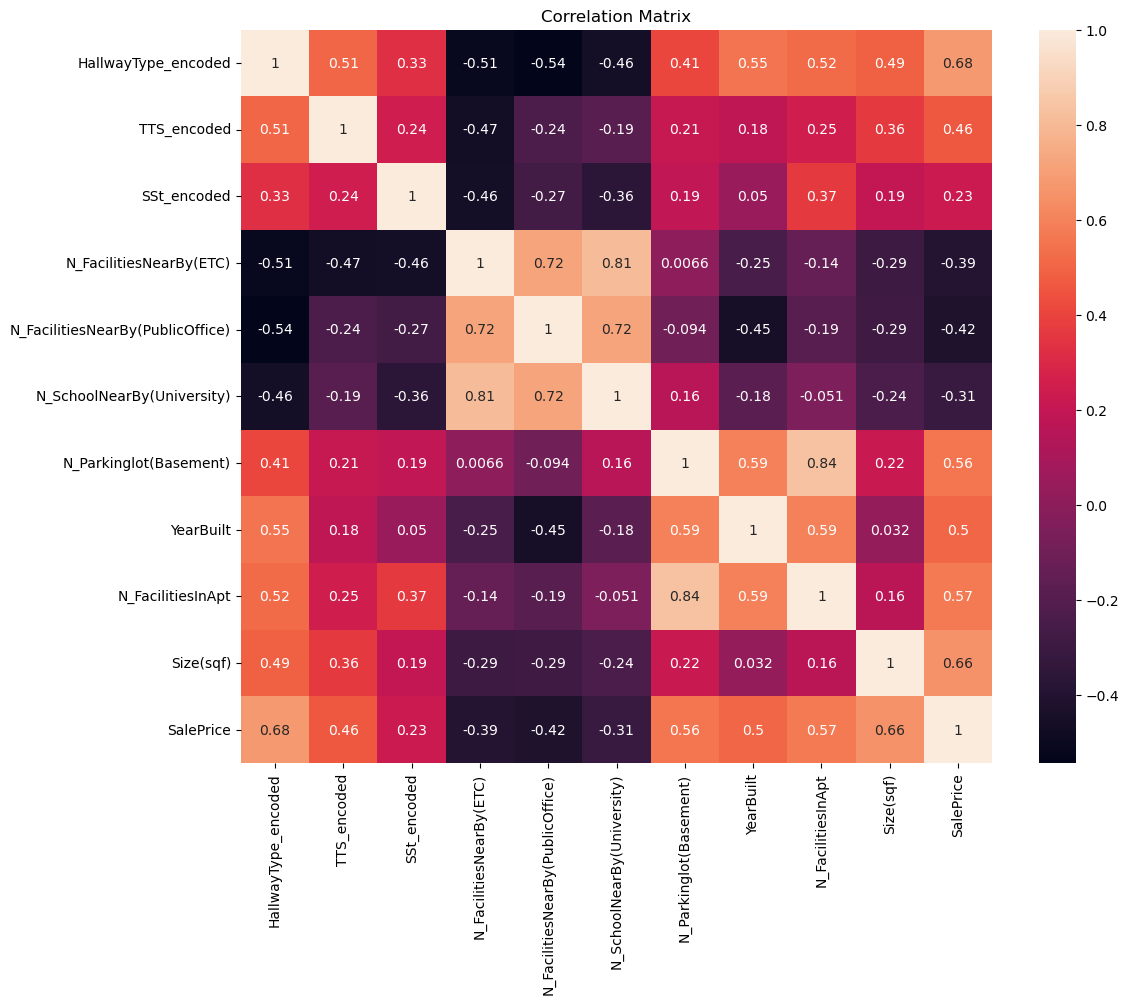

In [290]:
hallway_mapping = {'terraced': 2, 'mixed': 1, 'corridor': 0}
df['HallwayType_encoded'] = df['HallwayType'].map(hallway_mapping)
TTS_mapping = {"0~5min":4, '10min~15min':3, '15min~20min':2, '5min~10min':1 , 'no_bus_stop_nearby':0}
df['TTS_encoded'] = df['TimeToSubway'].map(TTS_mapping)
SSt_mapping = {"Kyungbuk_uni_hospital":7,"Chil-sung-market":6,"Bangoge":5,"Sin-nam":4, 'Banwoldang':3, 'no_subway_nearby':2, 'Myung-duk':1 , 'Daegu':0}
df['SSt_encoded'] = df['SubwayStation'].map(SSt_mapping)

correlation = df[["HallwayType_encoded","TTS_encoded","SSt_encoded",'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice']].corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True)
plt.tight_layout()
plt.title('Correlation Matrix')
plt.show()

- HallwayType_encoded (+0.68):
Tipe lorong sangat berkorelasi positif dengan harga jual. Tipe lorong yang lebih eksklusif (seperti "terraced") cenderung meningkatkan harga apartemen.

- TimeToSubway (TTS_encoded) (+0.45):
Apartemen yang lebih dekat dengan stasiun subway lebih berharga. Ini menunjukkan aksesibilitas sebagai faktor penting.

- SSt_encoded (Subway Station) (-0.012)
Korelasi sangat kecil, hampir tidak ada hubungan langsung antara jenis stasiun subway dan harga jual.

- N_FacilitiesNearBy(ETC) (-0.39):
Korelasi negatif menunjukkan bahwa semakin banyak fasilitas umum di sekitar apartemen, harga cenderung menurun. Ini bisa jadi terkait dengan densitas tinggi di area tertentu yang mengurangi eksklusivitas.

- N_FacilitiesNearBy(PublicOffice) (-0.41):
Sama seperti di atas, area dengan banyak fasilitas publik cenderung memiliki harga lebih rendah, mungkin karena faktor kepadatan penduduk.

- N_SchoolNearBy(University) (-0.31):
Kehadiran universitas di sekitar apartemen memiliki korelasi negatif ringan dengan harga, yang mungkin terkait dengan target pasar apartemen di dekat universitas.

- N_Parkinglot(Basement) (+0.55):
Jumlah tempat parkir di basement memiliki pengaruh moderat. Lebih banyak tempat parkir meningkatkan nilai apartemen.

- YearBuilt (+0.52):
Tahun pembangunan menunjukkan korelasi moderat. Apartemen yang lebih baru dihargai lebih tinggi.

- N_FacilitiesInApt (+0.57):
Fasilitas dalam apartemen juga berpengaruh signifikan terhadap harga. Apartemen dengan lebih banyak fasilitas bernilai lebih tinggi.

- Size(sqf) (+0.67):
Ukuran apartemen memiliki korelasi yang kuat dengan harga. Semakin besar apartemen, semakin tinggi harga jualnya.

> ### Di sini, kita akan memeriksa apakah terdapat kolom kategorikal yang memiliki hubungan dengan kolom SalePrice, sehingga proses encoding dapat dilakukan dengan lebih efektif.

### Data Visualization (categorical)

<Axes: xlabel='HallwayType', ylabel='SalePrice'>

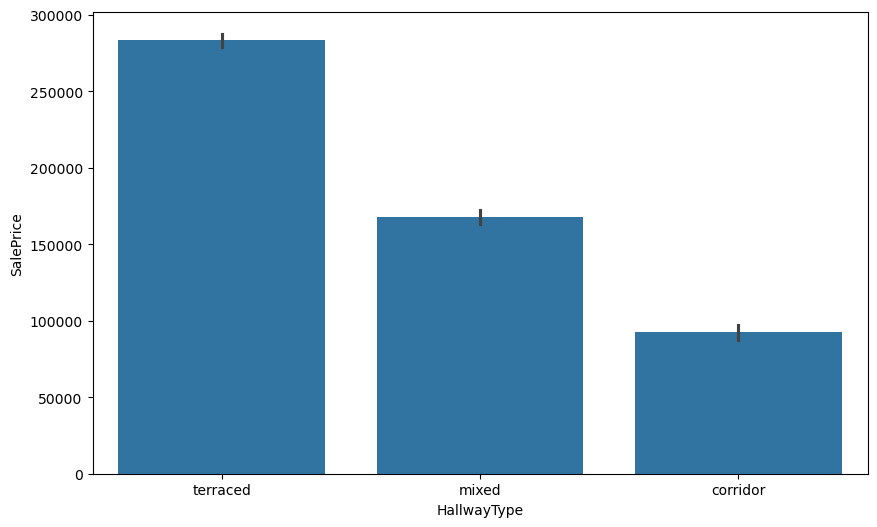

In [291]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="HallwayType",y="SalePrice")

- Dari grafik tersebut, terlihat bahwa HallwayType memiliki pola bertingkat dengan SalePrice. Oleh karena itu, HallwayType dapat diubah menjadi fitur numerik menggunakan ordinal encoding.

agar lebih meyakinkan, kita akan melihat korelasi antara HallwayType dengan SalePrice

<Axes: >

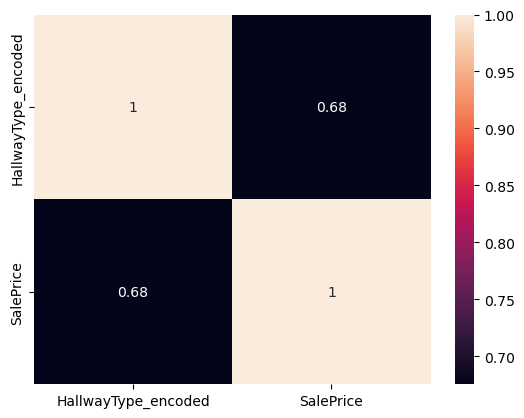

In [292]:
import pandas as pd

# encoding sementara
hallway_mapping = {'terraced': 2, 'mixed': 1, 'corridor': 0}
df['HallwayType_encoded'] = df['HallwayType'].map(hallway_mapping)

# Korelasi Pearson
correlation = df[['HallwayType_encoded', 'SalePrice']].corr()

sns.heatmap(data=correlation, annot=True)


- dari hasil korelasi tersebut terlihat bahwa hubungan HallwayType dengan SalePrice memiliki hubungan positif yang cukup kuat, artinya semakin tinggi kategori HallwayType (Terraced > mixed > corridor) maka harga cenderung akan lebih tinggi.
- dan ini menunjukan adanya hubungan linear, jadi kita akan menggunakan ordinal encoding

<Axes: xlabel='TimeToSubway', ylabel='SalePrice'>

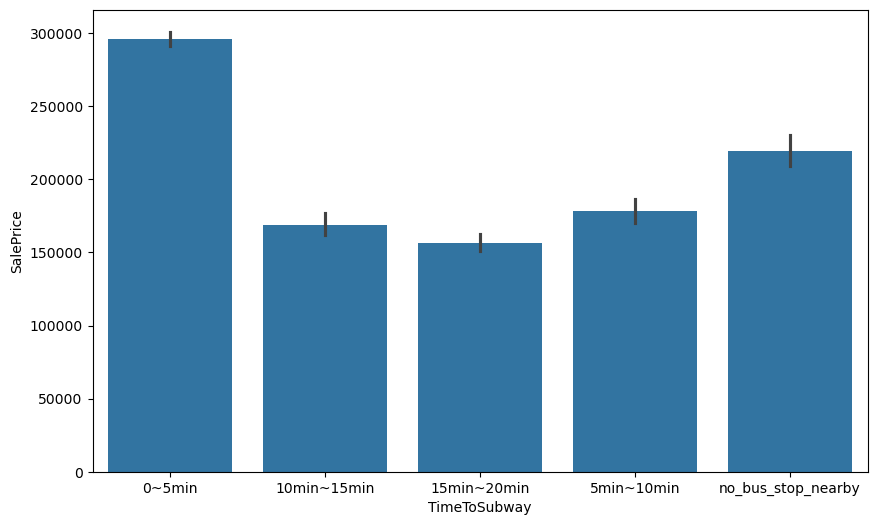

In [293]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="TimeToSubway",y="SalePrice")

- Dari grafik tersebut, terlihat bahwa TimeToSubway memiliki pola bertingkat terhadap SalePrice, oleh karena itu, kita akan mengubahnya menjadi ordinal, dan akan dikelompokan berdasarkan waktunya, diurutkan dari yang terendah sampai tertinggi

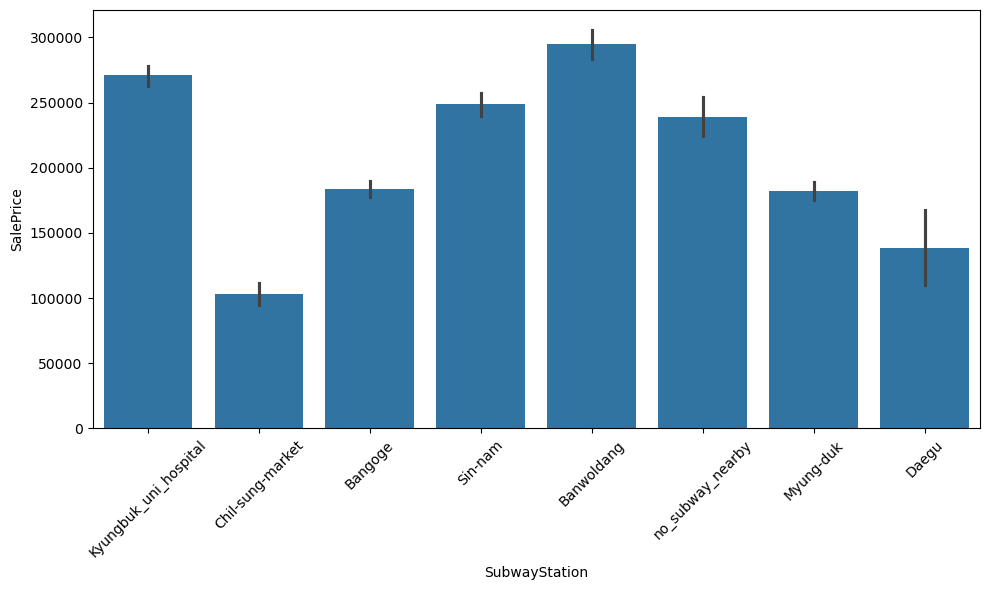

In [294]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="SubwayStation",y="SalePrice")

plt.xticks(rotation = 45)
plt.tight_layout()

- Grafik tersebut menunjukan bahwasanya tidak ada keterkaitan tingkatan antara kolom subwaystation dan saleprice, oleh karena itu encoding yang cocok ialah **One-Hot** karena untuk setiap unique nya tidak terlalu banyak.


> kesimpulan 
- HallwayType : OrdinalEncoder
- TimeToSubway : OrdinalEncoder
- SubwayStation : OneHotEncoder

> # Selanjutnya kita akan melihat data yang memiliki outlier

### Handling outlier

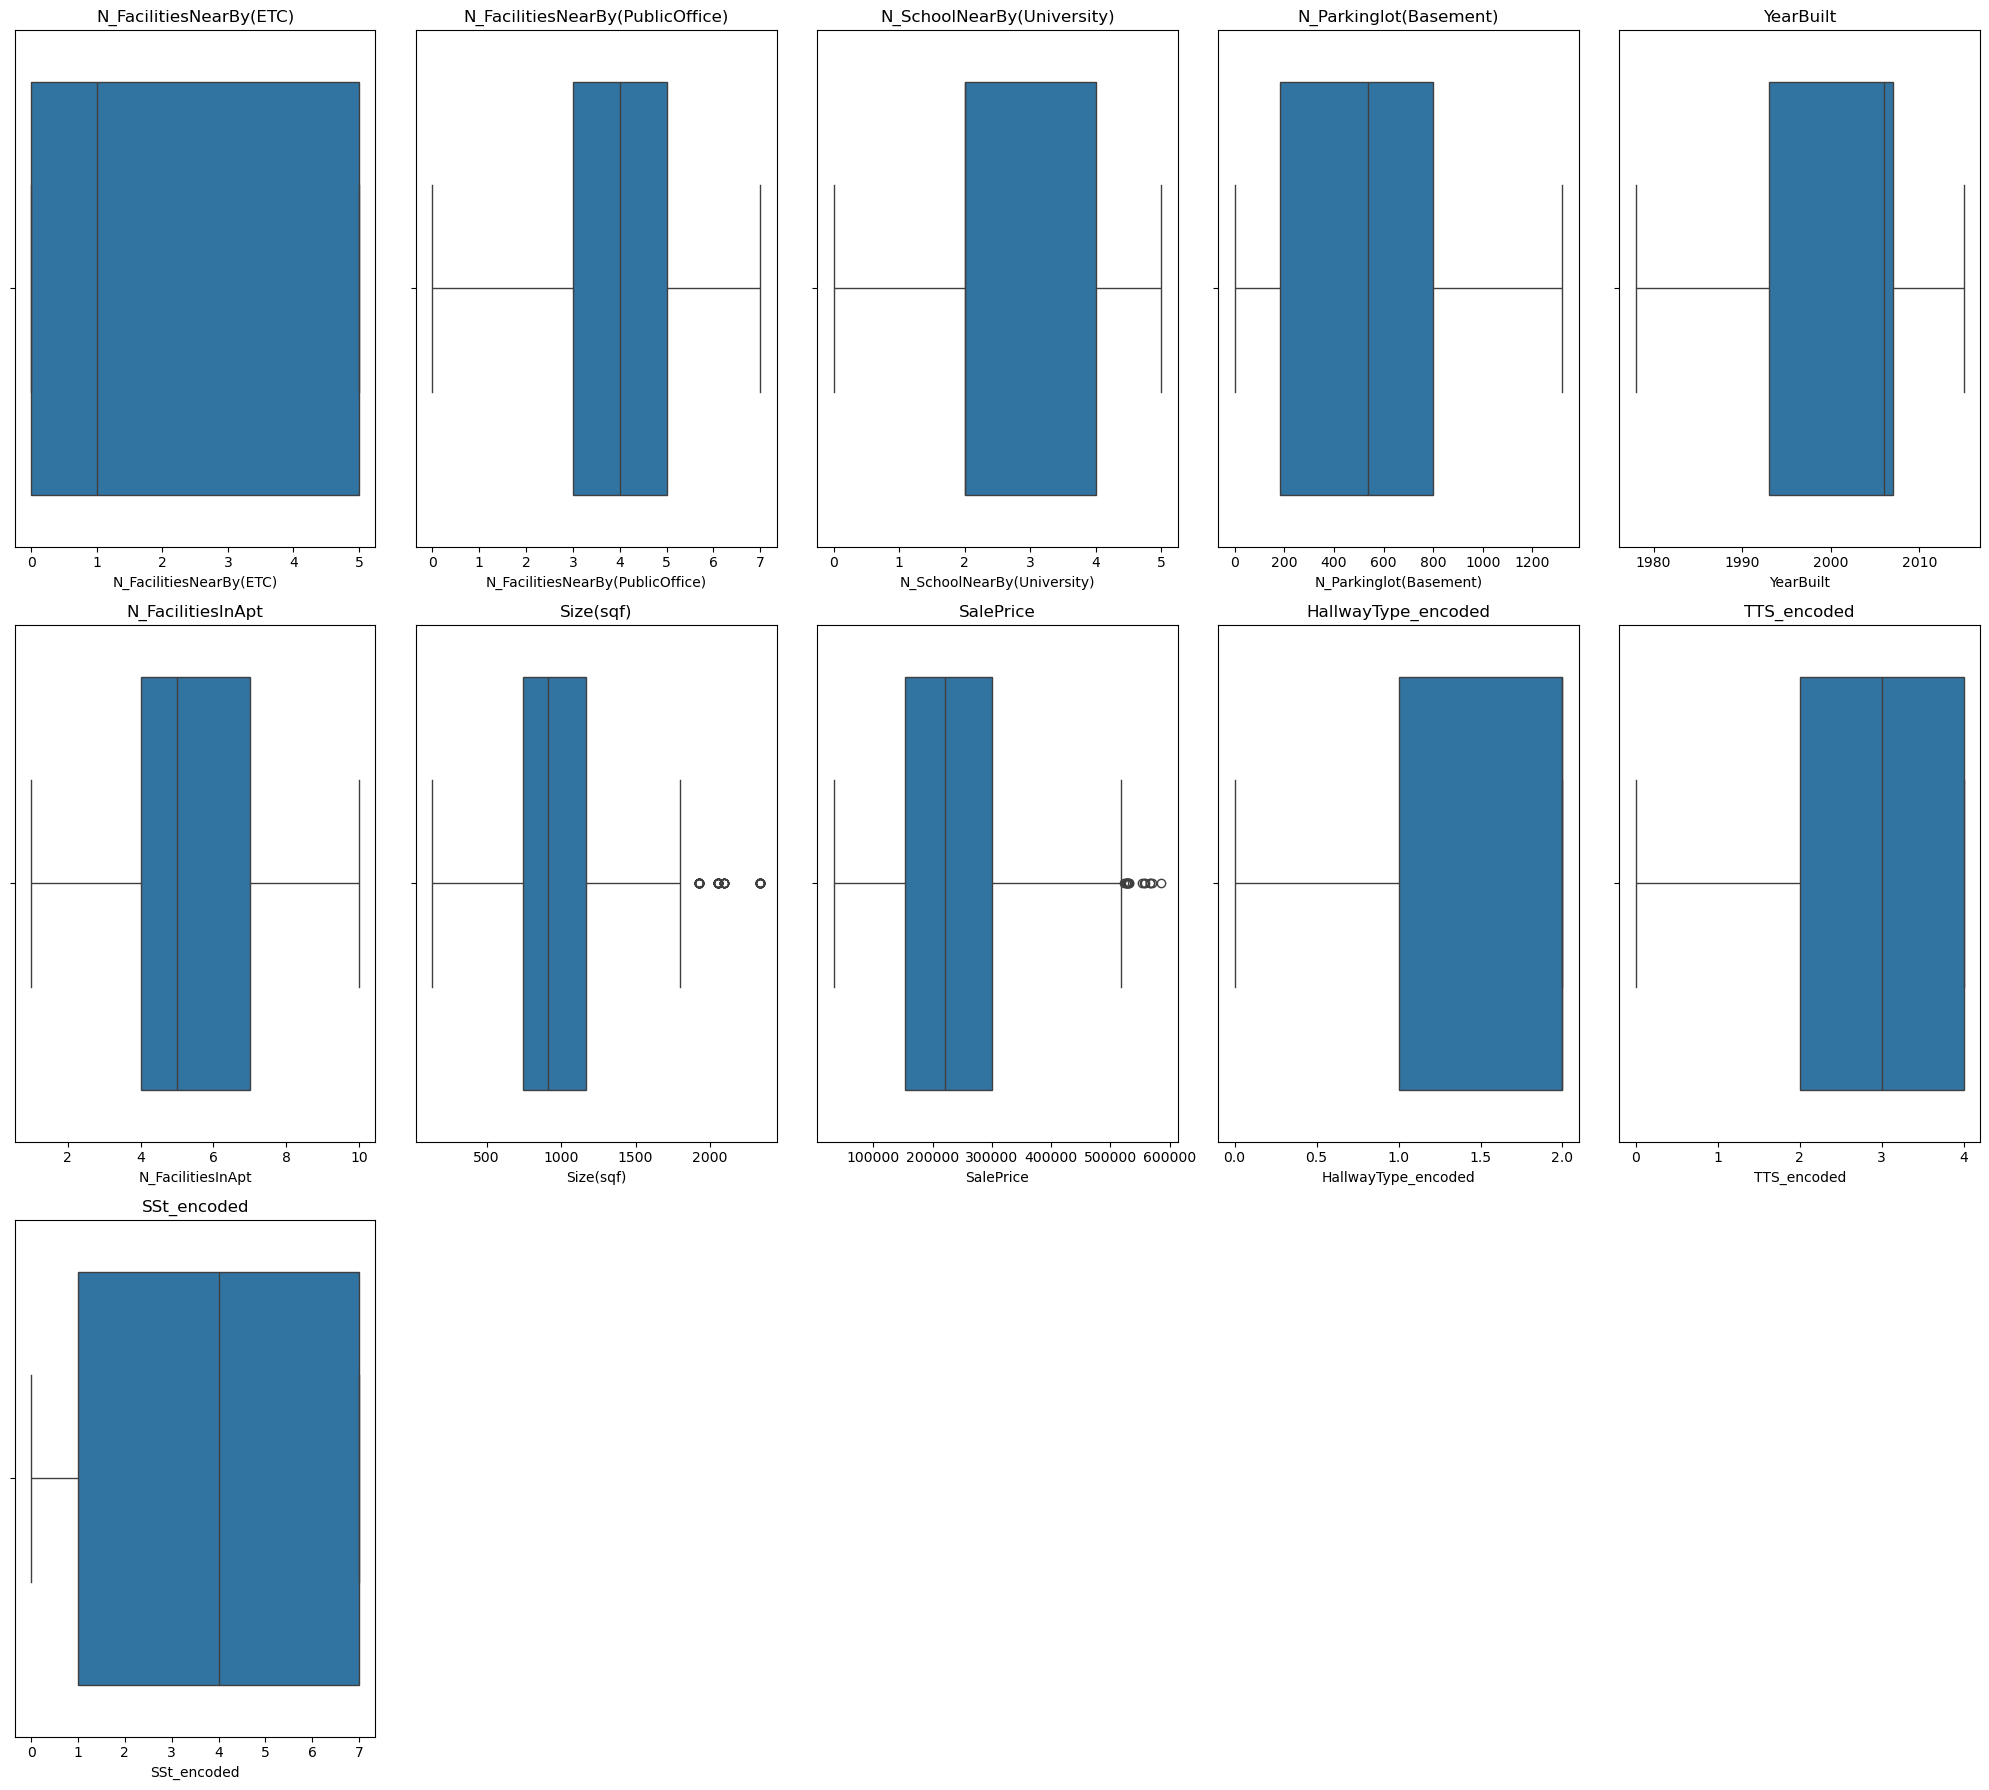

In [295]:
plt.figure(figsize=(20, 18))

col_num = []
for i in df.columns:
    if (df[i].dtype == "float64") | (df[i].dtype == 'int64'):
        col_num.append(i)

for i, col in enumerate(col_num):
    plt.subplot((len(col_num) // 5) + (len(col_num) % 5), 5, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

dari grafik tersebut, terdapat 2 kolom yang memiliki outlier yaitu 
- Size(sqf)
- SalePrice

In [296]:
Q1 = df["Size(sqf)"].quantile(0.25)
Q2 = df["Size(sqf)"].quantile(0.50)
Q3 = df["Size(sqf)"].quantile(0.75)

IQR = Q3 - Q1 

upperbound = Q3 + 1.5 * IQR

<Axes: xlabel='Size(sqf)'>

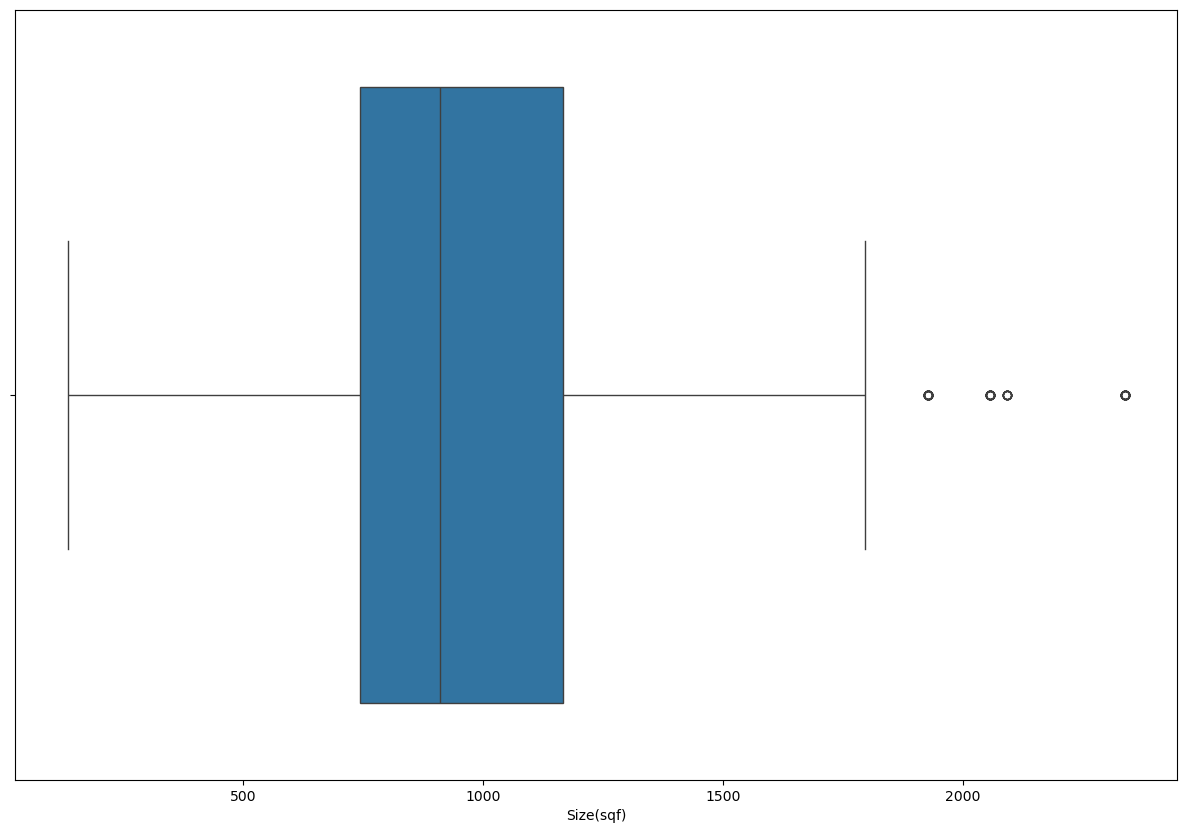

In [297]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df["Size(sqf)"] )

In [298]:
df[df["Size(sqf)"] >= upperbound]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,HallwayType_encoded,TTS_encoded,SSt_encoded
104,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,243362,1,2,1
129,terraced,0~5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,2056,424778,2,4,4
198,terraced,0~5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,348283,2,4,7
224,terraced,0~5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,566371,2,4,7
274,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,2092,300884,2,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,2092,407079,2,3,7
2618,terraced,0~5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,556637,2,4,7
2628,terraced,0~5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,383716,2,4,7
2653,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,193805,1,2,1


- Outlier pada kolom Size (sqf) akan dihapus karena jumlahnya cukup signifikan. outlier ini dapat mengganggu hasil proses modeling menjadi buruk, sehingga penghapusan dilakukan untuk meningkatkan akurasi dan kualitas model.

In [299]:
df = df[df["Size(sqf)"]<= upperbound]

<Axes: xlabel='Size(sqf)'>

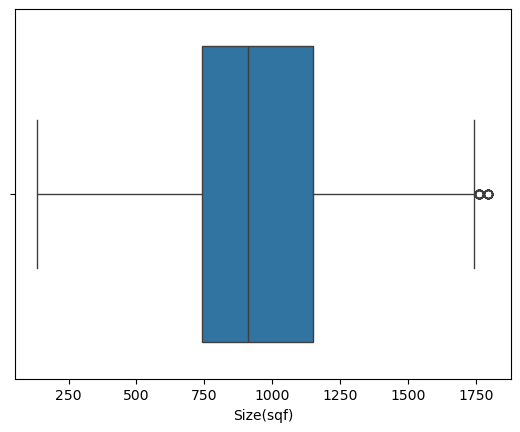

In [300]:

sns.boxplot(x=df["Size(sqf)"] )

- karena masih terdapat outlier ketika sudah dihapus, maka kita scaling yang akan kita gunakan ialah robust scaler, karena robust scaler sangat cocok untuk data yg memiliki outlier 
- sisanya kita jadikan standard scaler

<Axes: xlabel='SalePrice'>

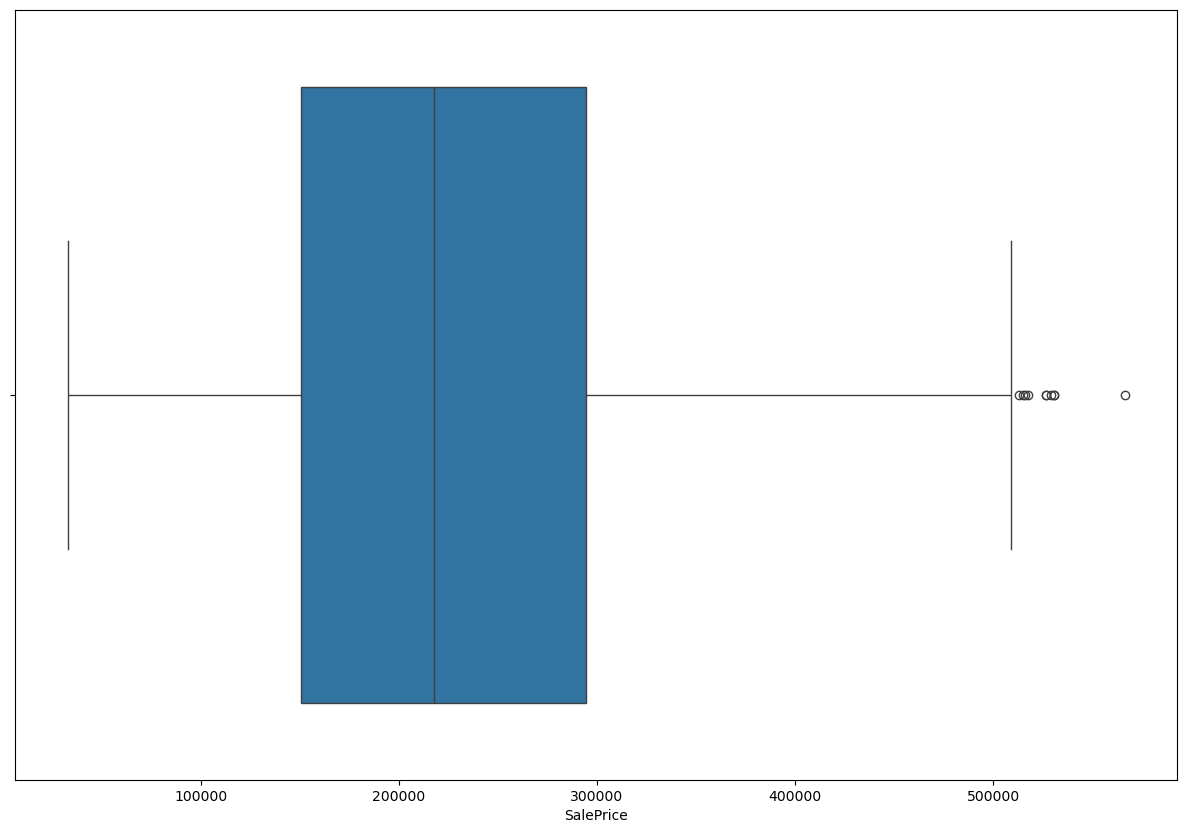

In [301]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df["SalePrice"] )

In [302]:
df[df["SalePrice"] > 500000]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,HallwayType_encoded,TTS_encoded,SSt_encoded
195,terraced,0~5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,566371,2,4,7
734,terraced,0~5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,508849,2,4,7
969,terraced,0~5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,530973,2,4,7
1047,terraced,0~5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1519,526548,2,4,7
1143,terraced,0~5min,Banwoldang,0.0,4.0,1.0,605.0,2007,5,1690,504424,2,4,3
1404,terraced,0~5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1519,504424,2,4,7
1437,terraced,0~5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,515929,2,4,7
1507,terraced,0~5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,526548,2,4,7
1520,terraced,0~5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,517699,2,4,7
1570,terraced,0~5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1519,530973,2,4,7


- Outlier pada kolom SalePrice tidak akan dihapus karena jumlahnya relatif sedikit, yaitu hanya 27 data. Oleh karena itu, outlier ini diperkirakan tidak akan memberikan dampak signifikan pada proses modeling.

> # Selanjutnya kita akan melihat Distribusi data dalam bentuk visualisasi

### Data Distribution

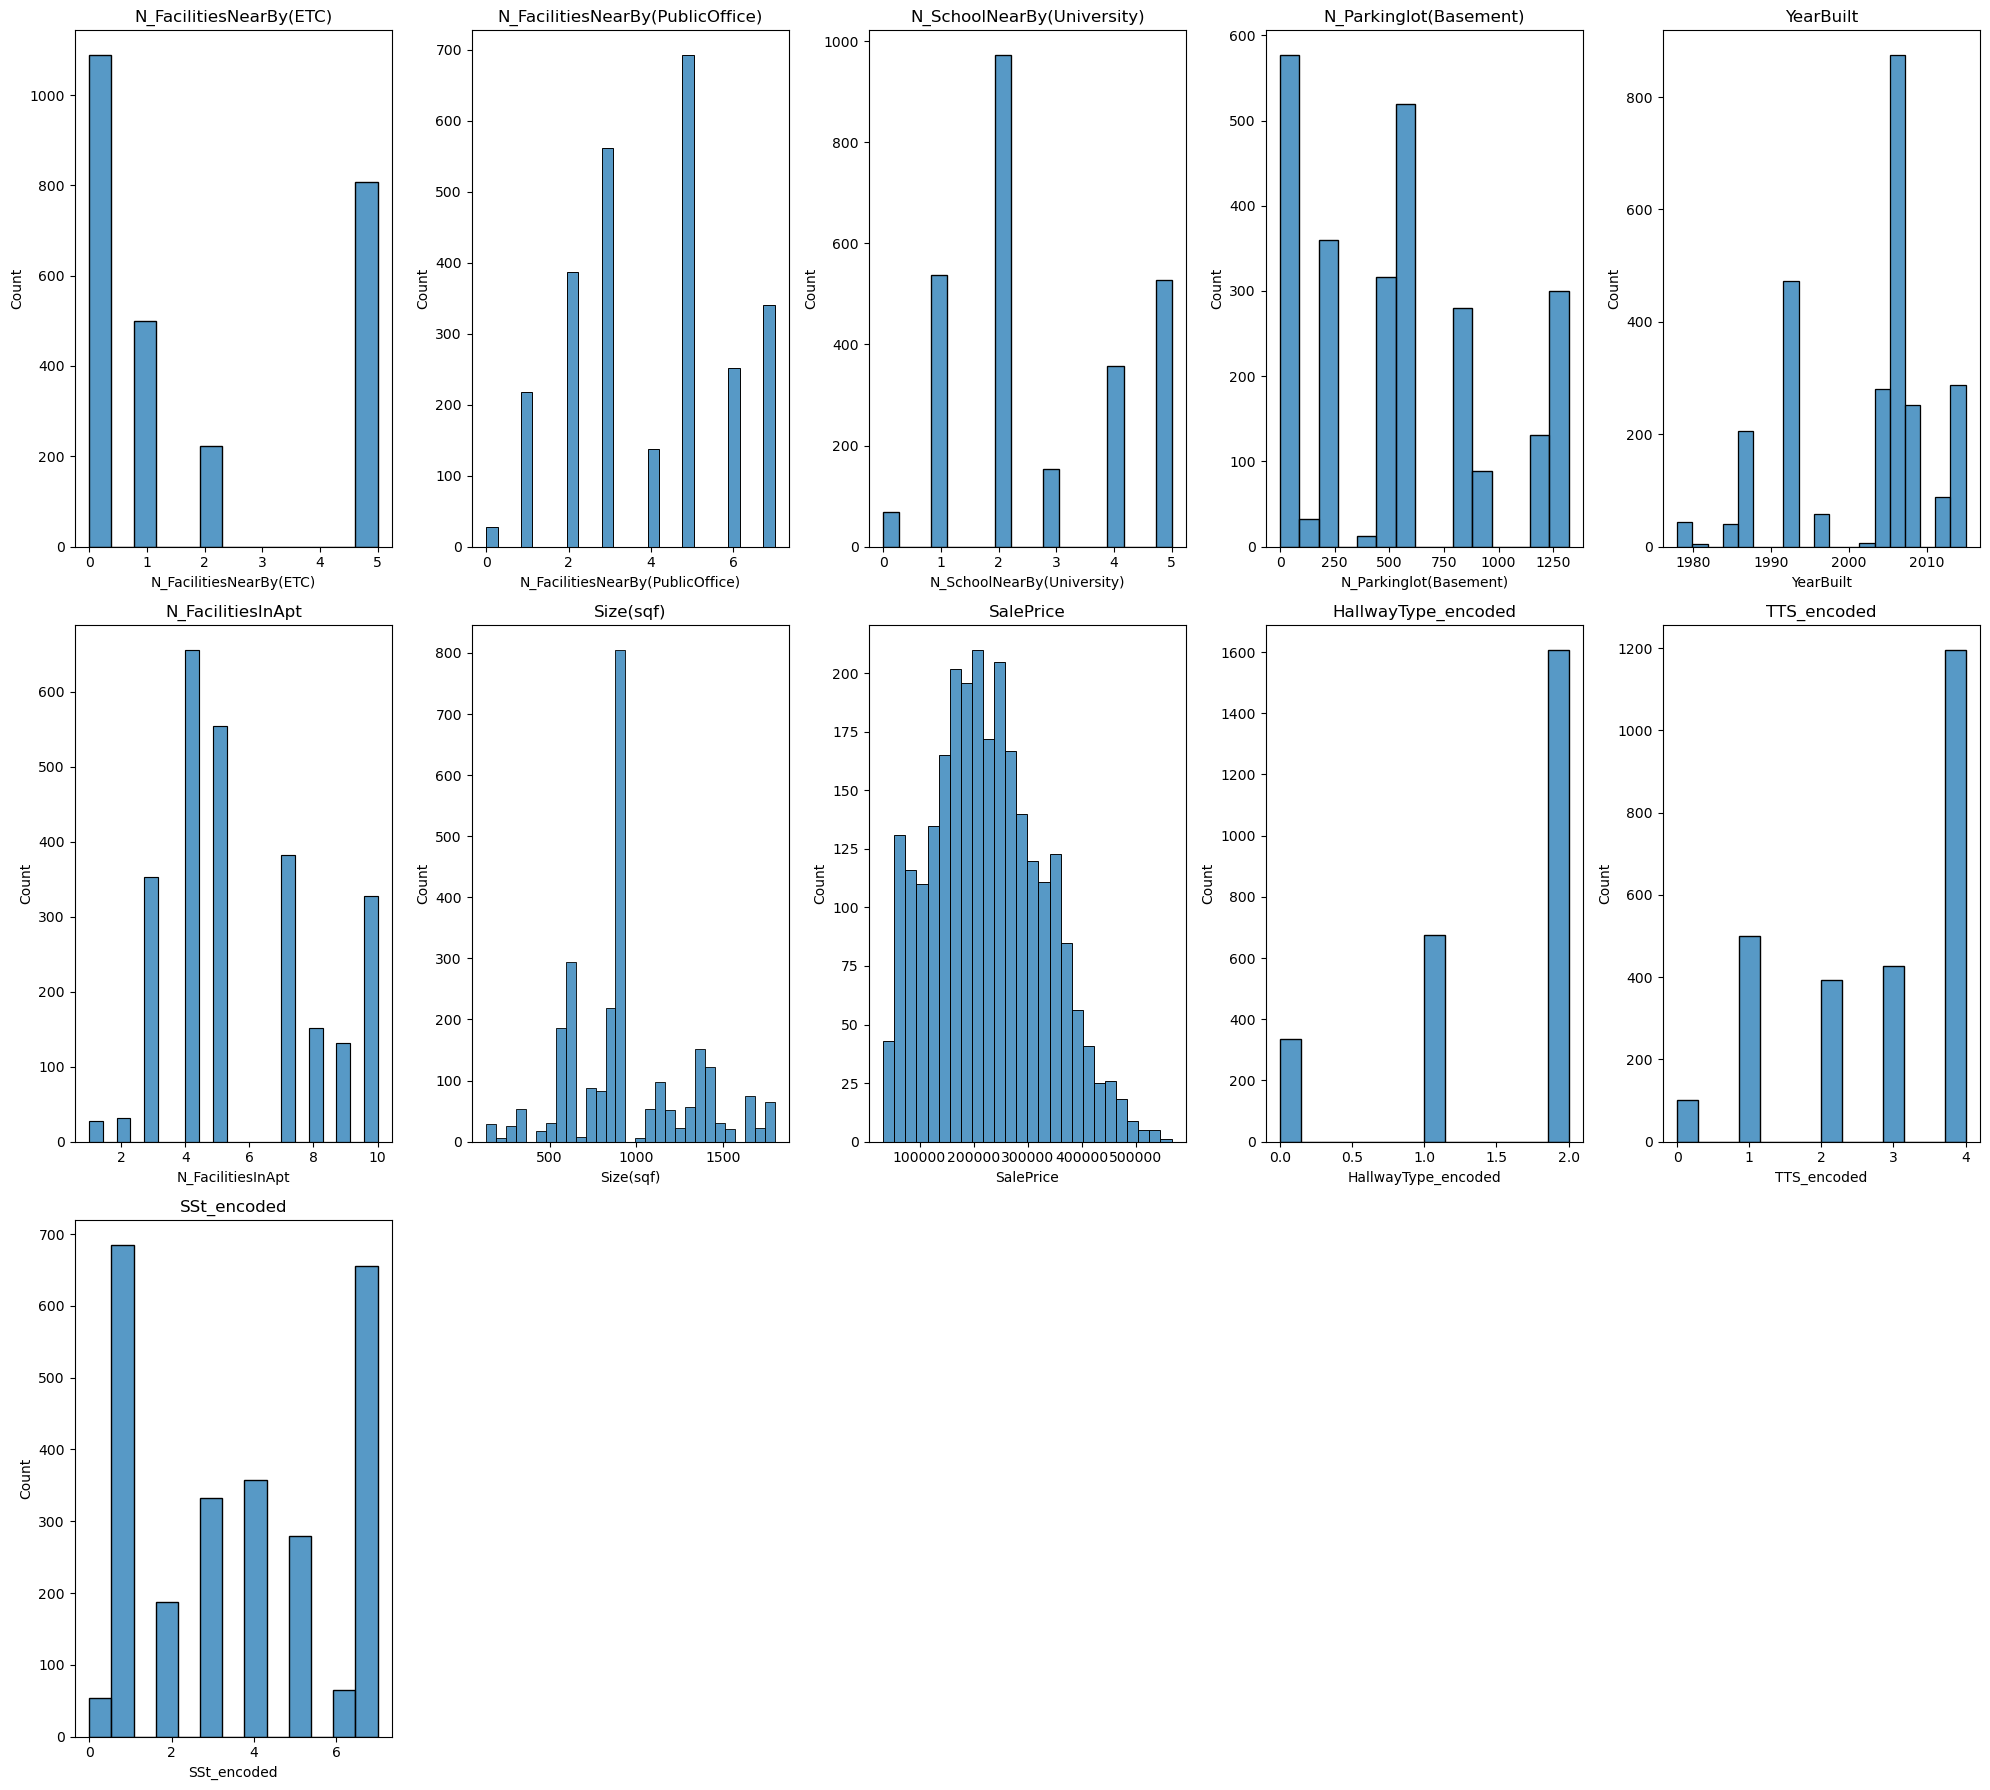

In [303]:
plt.figure(figsize=(20, 18))

col_num = []
for i in df.columns:
    if (df[i].dtype == "float64") | (df[i].dtype == 'int64'):
        col_num.append(i)

for i, col in enumerate(col_num):
    plt.subplot((len(col_num) // 5) + (len(col_num) % 5), 5, i+1)
    sns.histplot(data=df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

- grafik menunjukan bahwa data tidak normal, rata-rata kebanyakan distribusi datanya skewed right

> kesimpulan 
- penggunaan Metrik MAE dan MAPE cocok untuk data yang tidak terdistribusi normal dan juga terdapat outlier, karena kedua metrik tersebut tidak sensitif terhadap outlier dan cocok untuk data yg tidak terdistribusi normal

# Define X and y

In [309]:
df.columns

Index(['HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice', 'HallwayType_encoded',
       'TTS_encoded', 'SSt_encoded'],
      dtype='object')

In [313]:
X = df[['HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)']]
y = df["SalePrice"]

In [314]:
X 

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf)
0,terraced,0~5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914
4,terraced,0~5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743
...,...,...,...,...,...,...,...,...,...,...
2696,terraced,0~5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818
2697,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761
2698,terraced,0~5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914
2699,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451


# Splitting

In [305]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = 0,
    test_size = 0.2
)

# Encoding

- OrdinalEncoder : HallwayType, TimeToSubway
- OneHotEncoder : SubwayStation
- StandardScaler : N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice),
                    N_SchoolNearBy(University), N_Parkinglot(Basement), N_FacilitiesInApt, YearBuilt
- RobustScaler : Size(sqf)

In [37]:
from sklearn.compose import ColumnTransformer
from category_encoders import OneHotEncoder, OrdinalEncoder , BinaryEncoder 
from sklearn.preprocessing import RobustScaler , StandardScaler , MinMaxScaler
from sklearn.pipeline import Pipeline

In [38]:
ordinal_mapping = [{
    "col" : "HallwayType",
    "mapping" : {"corrider" : 1,
                 "mixed" : 2,
                 "terraced" : 3,
                }
    },
    
    {
    "col" : "TimeToSubway",
    "mapping" : {"no_bus_stop_nearby" : 0,
                 "15min~20min" : 1,
                 "10min~15min" : 2,
                 "5min~10min" : 3, 
                 "0~5min" : 4}
    }
]

In [ ]:
transformer = ColumnTransformer([
    ("OHE",OneHotEncoder(),["SubwayStation"]),
    ("ORD",OrdinalEncoder(cols=["HallwayType","TimeToSubway"], mapping = ordinal_mapping),["HallwayType","TimeToSubway"]),
    ("SS",StandardScaler(),['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
                            'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)','N_FacilitiesInApt','YearBuilt']),
    ("RBS",RobustScaler(),["Size(sqf)"])    # karena masih ada outlier jadi menggunakan robust                   
],remainder="drop") # agar kolom yang tidak tercantum di transformer di drop
transformer

ColumnTransformer(transformers=[('OHE', OneHotEncoder(), ['SubwayStation']),
                                ('ORD',
                                 OrdinalEncoder(cols=['HallwayType',
                                                      'TimeToSubway'],
                                                mapping=[{'col': 'HallwayType',
                                                          'data_type': dtype('O'),
                                                          'mapping': corrider    1
mixed       2
terraced    3
dtype: int64},
                                                         {'col': 'TimeToSubway',
                                                          'data_type': dtype('O'),
                                                          'mapping': no_bus_stop_nearby    0
15min~20min           1
10min~15min           2
5min~10min            3
0~5min                4
dtype: int64}]),
                                 ['HallwayType', 'TimeToSubway']),
                                ('SS', StandardScaler(),
                                 ['N_FacilitiesNearBy(ETC)',
                                  'N_FacilitiesNearBy(PublicOffice)',
                                  'N_SchoolNearBy(University)',
                                  'N_Parkinglot(Basement)', 'N_FacilitiesInApt',
                                  'YearBuilt']),
                                ('RBS', RobustScaler(), ['Size(sqf)'])])

In [40]:
transformer.fit(X_train)
X_train_prep = transformer.transform(X_train)
X_test_prep = transformer.transform(X_test)

# Modeling

In [41]:
from sklearn.model_selection import cross_val_score, cross_validate
from catboost import CatBoostRegressor

In [ ]:


# Daftar model
list_algo = [
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    RandomForestRegressor(),
    XGBRegressor(),
    CatBoostRegressor()
]

# Nama model
list_algo_names = [
    "DecisionTreeRegressor",
    "KNeighborsRegressor",
    "LinearRegression",
    "Lasso",
    "Ridge",
    "RandomForestRegressor",
    "XGBRegressor",
    "CatBoostRegressor"
]

# Scorer
scorer = ['neg_mean_squared_error',
    'neg_root_mean_squared_error',
    'neg_mean_absolute_error',
    'neg_mean_absolute_percentage_error',
    'r2']

list_mean_mse = []
list_std_mse = []

list_mean_rmse = []
list_std_rmse = []

list_mean_mae = []
list_std_mae = [] 

list_mean_mape = []
list_std_mape = []

list_mean_r2 = []
list_std_r2 = []


for model in list_algo:  
    # Define pipeline
    pipe = Pipeline([
        ('preprocessing', transformer),  # Pastikan transformer sudah didefinisikan sebelumnya
        ('modeling', model)
    ])

    # Cross-validation
    model_cv = cross_validate(estimator=pipe,
                              X=X_train,
                              y=y_train,
                              cv=5,
                              scoring=scorer)

    # Scoring
    list_mean_mse.append(-1 * model_cv['test_neg_mean_squared_error'].mean())
    list_std_mse.append(-1 * model_cv['test_neg_mean_squared_error'].std())

    list_mean_rmse.append(-1 * model_cv['test_neg_root_mean_squared_error'].mean())
    list_std_rmse.append(-1 * model_cv['test_neg_root_mean_squared_error'].std())

    list_mean_mae.append(-1 * model_cv['test_neg_mean_absolute_error'].mean())
    list_std_mae.append(-1 * model_cv['test_neg_mean_absolute_error'].std())

    list_mean_mape.append(-1 * model_cv['test_neg_mean_absolute_percentage_error'].mean())
    list_std_mape.append(-1 * model_cv['test_neg_mean_absolute_percentage_error'].std())

    list_mean_r2.append(-1 * model_cv['test_r2'].mean())
    list_std_r2.append(-1 * model_cv['test_r2'].std())

# DataFrame
df_cv = pd.DataFrame()
df_cv['algo'] = list_algo_names  

df_cv['mean_MAPE'] = list_mean_mape
df_cv['std_MAPE'] = list_std_mape

df_cv['mean_MAE'] = list_mean_mae
df_cv['std_MAE'] = list_std_mae

df_cv['mean_RMSE'] = list_mean_rmse
df_cv['std_RMSE'] = list_std_rmse

df_cv['mean_MSE'] = list_mean_mse 
df_cv['std_MSE'] = list_std_mse

df_cv['mean_r2'] = list_mean_r2
df_cv['std_r2'] = list_std_r2

# Urutkan berdasarkan MAE
df_cv.sort_values(by="mean_MAPE", ascending=True, inplace=True)
df_cv


Learning rate set to 0.044415
0:	learn: 97871.7709729	total: 104ms	remaining: 1m 44s
1:	learn: 94982.8666955	total: 106ms	remaining: 52.9s
2:	learn: 92334.6931975	total: 107ms	remaining: 35.6s
3:	learn: 89832.8558691	total: 108ms	remaining: 27s
4:	learn: 87341.7037481	total: 109ms	remaining: 21.8s
5:	learn: 85006.0396756	total: 110ms	remaining: 18.3s
6:	learn: 82941.2348001	total: 111ms	remaining: 15.8s
7:	learn: 81029.8513867	total: 302ms	remaining: 37.5s
8:	learn: 79033.2450025	total: 304ms	remaining: 33.4s
9:	learn: 77030.1753894	total: 305ms	remaining: 30.1s
10:	learn: 75413.1732614	total: 305ms	remaining: 27.5s
11:	learn: 73631.0089824	total: 306ms	remaining: 25.2s
12:	learn: 71988.8325547	total: 308ms	remaining: 23.4s
13:	learn: 70402.2188252	total: 309ms	remaining: 21.8s
14:	learn: 69178.1997616	total: 310ms	remaining: 20.4s
15:	learn: 67891.0187953	total: 311ms	remaining: 19.1s
16:	learn: 66466.5351054	total: 313ms	remaining: 18.1s
17:	learn: 65190.0743665	total: 314ms	remainin

,algo,mean_MAPE,std_MAPE,mean_MAE,std_MAE,mean_RMSE,std_RMSE,mean_MSE,std_MSE,mean_r2,std_r2
7,CatBoostRegressor,0.189184,-0.004660,36538.203649,-498.861215,45400.055015,-500.476748,2.061415e+09,-4.529753e+07,-0.799797,-0.012839
6,XGBRegressor,0.190928,-0.006829,36718.624303,-658.213686,45807.075494,-673.939560,2.098742e+09,-6.141578e+07,-0.796169,-0.013760
5,RandomForestRegressor,0.191230,-0.006368,36750.837585,-662.312055,45843.442728,-755.254774,2.102192e+09,-6.933558e+07,-0.795763,-0.015171
0,DecisionTreeRegressor,0.191420,-0.007087,36760.212163,-697.155560,45970.039187,-868.132594,2.113998e+09,-7.980324e+07,-0.794634,-0.015502
1,KNeighborsRegressor,0.192935,-0.012389,37654.282343,-1087.263525,48020.386267,-810.466979,2.306614e+09,-7.810421e+07,-0.775939,-0.016203
4,Ridge,0.217322,-0.006235,41613.524363,-760.523286,50648.340959,-706.525208,2.565754e+09,-7.119833e+07,-0.751060,-0.012216
3,Lasso,0.217388,-0.006319,41607.607321,-746.526688,50650.717118,-697.575245,2.565982e+09,-7.028517e+07,-0.751036,-0.012196
2,LinearRegression,0.217620,-0.006105,41633.120185,-776.583848,50688.404601,-743.281479,2.569867e+09,-7.503774e+07,-0.750665,-0.012338


- dari tabel tersebut terdapat 3 model yang memiliki score yang bagus, oleh karena itu kita bandingkan ketiga model tersebut, yaitu CatBoostRegressor, XGBRegressor, RandomForestRegressor.

- lets compare 

In [43]:
# Import semua model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor  # Pastikan xgboost sudah terinstall

# Daftar model
list_algo = [
    CatBoostRegressor(),
    RandomForestRegressor(),
    XGBRegressor()
]

# Nama model
list_algo_names = [
    "CatBoostRegressor",
    "XGBRegressor",
    "RandomForestRegressor"
]

# Scorer
scorer = ['neg_mean_squared_error',
    'neg_root_mean_squared_error',
    'neg_mean_absolute_error',
    'neg_mean_absolute_percentage_error',
    'r2']


list_mean_mse = []
list_std_mse = []

list_mean_rmse = []
list_std_rmse = []

list_mean_mae = []
list_std_mae = [] 

list_mean_mape = []
list_std_mape = []

list_mean_r2 = []
list_std_r2 = []




for model in list_algo:  # Iterasi berdasarkan objek model, bukan string nama
    # Define pipeline
    pipe = Pipeline([
        ('preprocessing', transformer),  # Pastikan transformer sudah didefinisikan sebelumnya
        ('modeling', model)
    ])

    # Cross-validation
    model_cv = cross_validate(estimator=pipe,
                              X=X_train,
                              y=y_train,
                              cv=5,
                              scoring=scorer)

    # Scoring


    list_mean_mse.append(-1 * model_cv['test_neg_mean_squared_error'].mean())
    list_std_mse.append(-1 * model_cv['test_neg_mean_squared_error'].std())

    list_mean_rmse.append(-1 * model_cv['test_neg_root_mean_squared_error'].mean())
    list_std_rmse.append(-1 * model_cv['test_neg_root_mean_squared_error'].std())

    list_mean_mae.append(-1 * model_cv['test_neg_mean_absolute_error'].mean())
    list_std_mae.append(-1 * model_cv['test_neg_mean_absolute_error'].std())

    list_mean_mape.append(-1 * model_cv['test_neg_mean_absolute_percentage_error'].mean())
    list_std_mape.append(-1 * model_cv['test_neg_mean_absolute_percentage_error'].std())

    list_mean_r2.append(-1 * model_cv['test_r2'].mean())
    list_std_r2.append(-1 * model_cv['test_r2'].std())

# DataFrame
df_compare = pd.DataFrame()
df_compare['algo'] = list_algo_names  

df_compare['mean_MAPE'] = list_mean_mape
df_compare['std_MAPE'] = list_std_mape

df_compare['mean_MAE'] = list_mean_mae
df_compare['std_MAE'] = list_std_mae

df_compare['mean_RMSE'] = list_mean_rmse
df_compare['std_RMSE'] = list_std_rmse

df_compare['mean_MSE'] = list_mean_mse 
df_compare['std_MSE'] = list_std_mse

df_compare['mean_r2'] = list_mean_r2
df_compare['std_r2'] = list_std_r2


# Urutkan berdasarkan MAE
df_compare.sort_values(by="mean_MAPE", ascending=True, inplace=True)
df_compare


Learning rate set to 0.044415
0:	learn: 97871.7709729	total: 660us	remaining: 660ms
1:	learn: 94982.8666955	total: 1.23ms	remaining: 611ms
2:	learn: 92334.6931975	total: 1.85ms	remaining: 617ms
3:	learn: 89832.8558691	total: 2.55ms	remaining: 635ms
4:	learn: 87341.7037481	total: 3.22ms	remaining: 640ms
5:	learn: 85006.0396756	total: 3.9ms	remaining: 645ms
6:	learn: 82941.2348001	total: 4.51ms	remaining: 640ms
7:	learn: 81029.8513867	total: 4.91ms	remaining: 609ms
8:	learn: 79033.2450025	total: 5.61ms	remaining: 618ms
9:	learn: 77030.1753894	total: 6.43ms	remaining: 636ms
10:	learn: 75413.1732614	total: 7.2ms	remaining: 648ms
11:	learn: 73631.0089824	total: 8.1ms	remaining: 667ms
12:	learn: 71988.8325547	total: 9.04ms	remaining: 686ms
13:	learn: 70402.2188252	total: 10.1ms	remaining: 710ms
14:	learn: 69178.1997616	total: 10.8ms	remaining: 710ms
15:	learn: 67891.0187953	total: 11.7ms	remaining: 717ms
16:	learn: 66466.5351054	total: 12.8ms	remaining: 742ms
17:	learn: 65190.0743665	total: 

,algo,mean_MAPE,std_MAPE,mean_MAE,std_MAE,mean_RMSE,std_RMSE,mean_MSE,std_MSE,mean_r2,std_r2
0,CatBoostRegressor,0.189184,-0.004660,36538.203649,-498.861215,45400.055015,-500.476748,2.061415e+09,-4.529753e+07,-0.799797,-0.012839
1,XGBRegressor,0.190799,-0.006182,36712.870975,-625.155890,45802.225847,-722.718881,2.098366e+09,-6.619158e+07,-0.796127,-0.015100
2,RandomForestRegressor,0.190928,-0.006829,36718.624303,-658.213686,45807.075494,-673.939560,2.098742e+09,-6.141578e+07,-0.796169,-0.013760


- Dari tabel tersebut kita bisa lihat bahwa model yang paling bagus itu catboost

- akan tetapi kita akan mencoba membandingkan model CatBoostRegressor, RandomForestRegressor, dan XGBRegressor ke dalam hyperparameter

## CatBoost Hyperparam

In [44]:
model_cbr = CatBoostRegressor(used_ram_limit="3GB")


pipe_model_cbr = Pipeline([
    ("preprocessing",transformer),
    ("modeling",CatBoostRegressor())
])

pipe_model_cbr.fit(X_train,y_train)

y_pred_before_tun = pipe_model_cbr.predict(X_test)

    # Scoring
mae = mean_absolute_error(y_test, y_pred_before_tun)
mape = mean_absolute_percentage_error(y_test, y_pred_before_tun)
rmse = root_mean_squared_error(y_test, y_pred_before_tun)
mse = mean_squared_error(y_test, y_pred_before_tun)
r2 = r2_score(y_test, y_pred_before_tun)

score_before_tuning_cbr = pd.DataFrame({
    "Model" : ["CatBoostRegressor"],
    "MAPE" : [mape],
    "MAE" : [mae],
    "MSE" : [mse],
    "RMSE" : [rmse],
    "R2" : [r2]
})
score_before_tuning_cbr

Learning rate set to 0.046011
0:	learn: 98462.0543124	total: 5.06ms	remaining: 5.05s
1:	learn: 95491.2863161	total: 6.57ms	remaining: 3.28s
2:	learn: 92480.8762030	total: 7.74ms	remaining: 2.57s
3:	learn: 89767.6914454	total: 8.81ms	remaining: 2.19s
4:	learn: 87229.5806909	total: 9.79ms	remaining: 1.95s
5:	learn: 84910.2975638	total: 11.4ms	remaining: 1.89s
6:	learn: 82725.7124822	total: 12.6ms	remaining: 1.79s
7:	learn: 80729.5392914	total: 13.7ms	remaining: 1.69s
8:	learn: 78986.6654072	total: 15ms	remaining: 1.65s
9:	learn: 76895.8630980	total: 16.3ms	remaining: 1.61s
10:	learn: 74915.5878184	total: 17.7ms	remaining: 1.59s
11:	learn: 73135.7798712	total: 19.3ms	remaining: 1.59s
12:	learn: 71398.7821796	total: 20.9ms	remaining: 1.59s
13:	learn: 69810.4532703	total: 22.4ms	remaining: 1.58s
14:	learn: 68319.1280786	total: 24ms	remaining: 1.58s
15:	learn: 66927.1012050	total: 25.7ms	remaining: 1.58s
16:	learn: 65586.4653448	total: 27.1ms	remaining: 1.56s
17:	learn: 64347.9104285	total: 

,Model,MAPE,MAE,MSE,RMSE,R2
0,CatBoostRegressor,0.196998,36965.601702,2.063431e+09,45425.003773,0.808295


- lets compare the model by hyperparam

> CatBoostRegressor

In [45]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from skopt import BayesSearchCV

In [46]:
model_cbr = CatBoostRegressor(used_ram_limit="3GB")

cbr_params = {
    'modeling__iterations': [500,1000,2000],            # Jumlah iterasi
    'modeling__learning_rate': [0.01,0.05,0.1],                 # Kecepatan pembelajaran
    'modeling__max_depth': [3,5,7],                                    # Kedalaman pohon
    'modeling__l2_leaf_reg': [1, 3, 5, 7],                        # Regularisasi L2
    'modeling__bagging_temperature': [0.5, 1, 2],                   # Kontrol bootstrap
              
}

pipe_model = Pipeline([
    ("preprocessing",transformer),
    ("modeling",model_cbr)
])

random_search_cbr = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=cbr_params,
    n_iter=50,  
    cv=5,       
    scoring='neg_mean_absolute_percentage_error',  
    random_state=0,
    n_jobs=-1  
)



In [47]:
random_search_cbr.fit(X_train,y_train)

0:	learn: 95782.6473092	total: 1.7ms	remaining: 1.7s
1:	learn: 90517.9520091	total: 3.57ms	remaining: 1.78s
2:	learn: 86106.2788405	total: 5.1ms	remaining: 1.7s
3:	learn: 82261.2853269	total: 6.57ms	remaining: 1.64s
4:	learn: 78278.2905307	total: 8.27ms	remaining: 1.65s
5:	learn: 74888.1525754	total: 9.92ms	remaining: 1.64s
6:	learn: 71907.8926327	total: 11.5ms	remaining: 1.63s
7:	learn: 69205.3105068	total: 12.4ms	remaining: 1.53s
8:	learn: 66568.1305328	total: 13.8ms	remaining: 1.52s
9:	learn: 64526.4178989	total: 15.4ms	remaining: 1.53s
10:	learn: 62692.9609191	total: 17ms	remaining: 1.53s
11:	learn: 61128.1037165	total: 18.3ms	remaining: 1.51s
12:	learn: 59831.1011360	total: 20.1ms	remaining: 1.53s
13:	learn: 58544.3183798	total: 21.6ms	remaining: 1.52s
14:	learn: 57035.4035325	total: 24.8ms	remaining: 1.63s
15:	learn: 55997.0839631	total: 26.9ms	remaining: 1.65s
16:	learn: 54850.4197352	total: 28.1ms	remaining: 1.62s
17:	learn: 54015.6176031	total: 29.5ms	remaining: 1.61s
18:	lear

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('OHE',
                                                                               OneHotEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('ORD',
                                                                               OrdinalEncoder(cols=['HallwayType',
                                                                                                    'TimeToSubway'],
                                                                                              mapping=[{'col': 'HallwayType',
                                                                                                        'data_type': dtype('O'),
                                                                                                        'mapping': corrider    1
mixed       2
terraced    3
dtype: int64},
                                                                                                       {'col': 'TimeToSubway',
                                                                                                        'data_type': dtype('O'),
                                                                                                        'mappi...
                                              <catboost.core.CatBoostRegressor object at 0x0000017C18326C60>)]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'modeling__bagging_temperature': [0.5,
                                                                          1,
                                                                          2],
                                        'modeling__iterations': [500, 1000,
                                                                 2000],
                                        'modeling__l2_leaf_reg': [1, 3, 5, 7],
                                        'modeling__learning_rate': [0.01, 0.05,
                                                                    0.1],
                                        'modeling__max_depth': [3, 5, 7]},
                   random_state=0,
                   scoring='neg_mean_absolute_percentage_error')

In [48]:
random_search_cbr.best_params_

{'modeling__max_depth': 3,
 'modeling__learning_rate': 0.1,
 'modeling__l2_leaf_reg': 1,
 'modeling__iterations': 1000,
 'modeling__bagging_temperature': 1}

In [49]:
random_search_cbr.best_score_

-0.1887148945451874

In [50]:
random_search_cbr.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('OHE', OneHotEncoder(),
                                                  ['SubwayStation']),
                                                 ('ORD',
                                                  OrdinalEncoder(cols=['HallwayType',
                                                                       'TimeToSubway'],
                                                                 mapping=[{'col': 'HallwayType',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': corrider    1
mixed       2
terraced    3
dtype: int64},
                                                                          {'col': 'TimeToSubway',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': no_bus_stop_nearby    0
15min~20min...
5min~10min            3
0~5min                4
dtype: int64}]),
                                                  ['HallwayType',
                                                   'TimeToSubway']),
                                                 ('SS', StandardScaler(),
                                                  ['N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_Parkinglot(Basement)',
                                                   'N_FacilitiesInApt',
                                                   'YearBuilt']),
                                                 ('RBS', RobustScaler(),
                                                  ['Size(sqf)'])])),
                ('modeling',
                 <catboost.core.CatBoostRegressor object at 0x0000017C162E9250>)])

In [51]:
best_model_cbr = random_search_cbr.best_estimator_

best_model_cbr.fit(X_train,y_train)

y_pred_after_tun = best_model_cbr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_after_tun)
mape = mean_absolute_percentage_error(y_test, y_pred_after_tun)
rmse = root_mean_squared_error(y_test, y_pred_after_tun)
mse = mean_squared_error(y_test, y_pred_after_tun)
r2 = r2_score(y_test, y_pred_after_tun)

score_after_tuning_cbr = pd.DataFrame({
    "Model" : ["CatBoostRegressor"],
    "MAPE" : [mape],
    "MAE" : [mae],
    "MSE" : [mse],
    "RMSE" : [rmse],
    "R2" : [r2]
})
score_after_tuning_cbr

0:	learn: 95782.6473092	total: 1.54ms	remaining: 1.54s
1:	learn: 90517.9520091	total: 3.47ms	remaining: 1.73s
2:	learn: 86106.2788405	total: 6.3ms	remaining: 2.09s
3:	learn: 82261.2853269	total: 7.4ms	remaining: 1.84s
4:	learn: 78278.2905307	total: 8.21ms	remaining: 1.63s
5:	learn: 74888.1525754	total: 9.56ms	remaining: 1.58s
6:	learn: 71907.8926327	total: 10.8ms	remaining: 1.53s
7:	learn: 69205.3105068	total: 12ms	remaining: 1.48s
8:	learn: 66568.1305328	total: 13.3ms	remaining: 1.47s
9:	learn: 64526.4178989	total: 14.6ms	remaining: 1.45s
10:	learn: 62692.9609191	total: 16ms	remaining: 1.44s
11:	learn: 61128.1037165	total: 17.1ms	remaining: 1.41s
12:	learn: 59831.1011360	total: 18.5ms	remaining: 1.4s
13:	learn: 58544.3183798	total: 21.6ms	remaining: 1.52s
14:	learn: 57035.4035325	total: 22.7ms	remaining: 1.49s
15:	learn: 55997.0839631	total: 24ms	remaining: 1.47s
16:	learn: 54850.4197352	total: 25.2ms	remaining: 1.46s
17:	learn: 54015.6176031	total: 26.5ms	remaining: 1.45s
18:	learn: 

,Model,MAPE,MAE,MSE,RMSE,R2
0,CatBoostRegressor,0.19661,36853.337299,2.052152e+09,45300.685908,0.809343


In [52]:
score_before_tuning_cbr

,Model,MAPE,MAE,MSE,RMSE,R2
0,CatBoostRegressor,0.196998,36965.601702,2.063431e+09,45425.003773,0.808295


In [53]:
score_after_tuning_cbr

,Model,MAPE,MAE,MSE,RMSE,R2
0,CatBoostRegressor,0.19661,36853.337299,2.052152e+09,45300.685908,0.809343


- hasil sebelum tuning dan hasil setelah tuning untuk model catboost tidak berbeda jauh signifikan 

In [54]:
print(f'''
      
CatBoost sebelum tuning :
MAPE : {round(score_before_tuning_cbr["MAPE"][0],4)}
MAE : {round(score_before_tuning_cbr["MAE"][0])}

CatBoost setelah tuning :
MAPE : {round(score_after_tuning_cbr["MAPE"][0],4)}
MAE : {round(score_after_tuning_cbr["MAE"][0])}

improvment menggunakan model CatBoost :
MAPE : {round((score_before_tuning_cbr["MAPE"][0] - score_after_tuning_cbr["MAPE"][0]) / score_before_tuning_cbr["MAPE"][0]*100,1)}%
MAE : {round(score_before_tuning_cbr["MAE"][0])-round(score_after_tuning_cbr["MAE"][0])}

hasil sebelum tuning dan hasil setelah tuning untuk model catboost tidak berbeda jauh signifikan, 
dapat disimpulkan bahwa model ini kurang baik untuk digunakan.
''')


      
CatBoost sebelum tuning :
MAPE : 0.197
MAE : 36966

CatBoost setelah tuning :
MAPE : 0.1966
MAE : 36853

improvment menggunakan model CatBoost :
MAPE : 0.2%
MAE : 113

hasil sebelum tuning dan hasil setelah tuning untuk model catboost tidak berbeda jauh signifikan, 
dapat disimpulkan bahwa model ini kurang baik untuk digunakan.



- Selanjutnya kita akan mencoba model RandomForest

## Random Forest Hyperparam

In [55]:
pipe_model_rfr = Pipeline([
    ("preprocessing",transformer),
    ("modeling",RandomForestRegressor())
])

pipe_model_rfr.fit(X_train,y_train)

y_pred_before_tun = pipe_model_rfr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_before_tun)
mape = mean_absolute_percentage_error(y_test, y_pred_before_tun)
rmse = root_mean_squared_error(y_test, y_pred_before_tun)
mse = mean_squared_error(y_test, y_pred_before_tun)
r2 = r2_score(y_test, y_pred_before_tun)

score_before_tuning_rfr = pd.DataFrame({
    "Model" : ["RandomForestRegressor"],
    "MAPE" : [mape],
    "MAE" : [mae],
    "MSE" : [mse],
    "RMSE" : [rmse],
    "R2" : [r2]
})
score_before_tuning_rfr

,Model,MAPE,MAE,MSE,RMSE,R2
0,RandomForestRegressor,0.201343,37274.108156,2.138660e+09,46245.645396,0.801306


In [56]:
model_rfr = RandomForestRegressor()

rfr_params = {
    'modeling__n_estimators': [50, 100, 200, 300, 400, 500],
    'modeling__max_depth': [5, 10, 15, 20],
    'modeling__min_samples_split': [2, 5, 10],
    'modeling__min_samples_leaf': [1, 2, 4],
    'modeling__bootstrap': [True, False]
}


pipe_model = Pipeline([
    ("preprocessing",transformer),
    ("modeling",model_rfr)
])

random_search_rfr = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=rfr_params,
    n_iter=20,  # Jumlah iterasi random
    cv=5,       # Cross-validation folds
    scoring='neg_mean_absolute_percentage_error',  # Metode evaluasi
    random_state=0,
    verbose=3,
    n_jobs=-1   # Gunakan semua core
)

In [57]:
random_search_rfr.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('OHE',
                                                                               OneHotEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('ORD',
                                                                               OrdinalEncoder(cols=['HallwayType',
                                                                                                    'TimeToSubway'],
                                                                                              mapping=[{'col': 'HallwayType',
                                                                                                        'data_type': dtype('O'),
                                                                                                        'mapping': corrider    1
mixed       2
terraced    3
dtype: int64},
                                                                                                       {'col': 'TimeToSubway',
                                                                                                        'data_type': dtype('O'),
                                                                                                        'mappi...
                                                                               ['Size(sqf)'])])),
                                             ('modeling',
                                              RandomForestRegressor())]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'modeling__bootstrap': [True, False],
                                        'modeling__max_depth': [5, 10, 15, 20],
                                        'modeling__min_samples_leaf': [1, 2, 4],
                                        'modeling__min_samples_split': [2, 5,
                                                                        10],
                                        'modeling__n_estimators': [50, 100, 200,
                                                                   300, 400,
                                                                   500]},
                   random_state=0, scoring='neg_mean_absolute_percentage_error',
                   verbose=3)

In [58]:
random_search_rfr.best_score_

-0.190862807866079

In [59]:
best_model_rfr = random_search_rfr.best_estimator_

best_model_rfr.fit(X_train,y_train)

y_pred_rfr = best_model_rfr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_rfr)
mape = mean_absolute_percentage_error(y_test, y_pred_rfr)
rmse = root_mean_squared_error(y_test, y_pred_rfr)
mse = mean_squared_error(y_test, y_pred_rfr)
r2 = r2_score(y_test, y_pred_rfr)

score_after_tuning_rfr = pd.DataFrame({
    "Model" : ["RandomForestRegressor"],
    "MAPE" : [mape],
    "MAE" : [mae],
    "MSE" : [mse],
    "RMSE" : [rmse],
    "R2" : [r2]
})
score_after_tuning_rfr

,Model,MAPE,MAE,MSE,RMSE,R2
0,RandomForestRegressor,0.201271,37246.652998,2.112132e+09,45957.939218,0.80377


In [60]:
score_before_tuning_rfr

,Model,MAPE,MAE,MSE,RMSE,R2
0,RandomForestRegressor,0.201343,37274.108156,2.138660e+09,46245.645396,0.801306


In [61]:
score_after_tuning_rfr

,Model,MAPE,MAE,MSE,RMSE,R2
0,RandomForestRegressor,0.201271,37246.652998,2.112132e+09,45957.939218,0.80377


In [62]:
print(f'''
RandomForestRegressor sebelum tuning :
MAE : {round(score_before_tuning_rfr["MAE"][0])}
MAPE : {round(score_before_tuning_rfr["MAPE"][0],4)}

RandomForestRegressor setelah tuning :
MAE : {round(score_after_tuning_rfr["MAE"][0])}
MAPE : {round(score_after_tuning_rfr["MAPE"][0],4)}

improvment menggunakan model RandomForestRegressor :
MAE : {round(score_before_tuning_rfr["MAE"][0])-round(score_after_tuning_rfr["MAE"][0])}
MAPE : {round((score_before_tuning_rfr["MAPE"][0] - score_after_tuning_rfr["MAPE"][0]) / score_before_tuning_rfr["MAPE"][0]*100,1)}%
''')


RandomForestRegressor sebelum tuning :
MAE : 37274
MAPE : 0.2013

RandomForestRegressor setelah tuning :
MAE : 37247
MAPE : 0.2013

improvment menggunakan model RandomForestRegressor :
MAE : 27
MAPE : 0.0%



- selanjutnya kita akan mencoba hyperparameter tuning menggunakan XGBoost

## XGBoost Hyperparam

In [63]:
pipe_model_xgb = Pipeline([
    ("preprocessing",transformer),
    ("modeling",XGBRegressor())
])

pipe_model_xgb.fit(X_train,y_train)

y_pred_before_tun = pipe_model_xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_before_tun)
mape = mean_absolute_percentage_error(y_test, y_pred_before_tun)
rmse = root_mean_squared_error(y_test, y_pred_before_tun)
mse = mean_squared_error(y_test, y_pred_before_tun)
r2 = r2_score(y_test, y_pred_before_tun)

score_before_tuning_xgb = pd.DataFrame({
    "Model" : ["XGBRegressor"],
    "MAPE" : [mape],
    "MAE" : [mae],
    "MSE" : [mse],
    "RMSE" : [rmse],
    "R2" : [r2]
})
score_before_tuning_xgb

,Model,MAPE,MAE,MSE,RMSE,R2
0,XGBRegressor,0.199418,37238.658367,2.122293e+09,46068.354955,0.802826


In [64]:
model_xgb = XGBRegressor()

xgb_params = {
    'modeling__learning_rate': [0.01, 0.05, 0.1],
    'modeling__max_depth': [3, 5, 7],
    'modeling__min_child_weight': [1, 3, 5],
    'modeling__subsample': [0.6, 0.8, 1.0],
    'modeling__colsample_bytree': [0.6, 0.8, 1.0],
    'modeling__gamma': [0, 1, 5],
    'modeling__reg_lambda': [0.01, 0.1, 1],
    'modeling__reg_alpha': [0, 0.1, 1],
    'modeling__n_estimators': [100, 200, 300],
    'modeling__scale_pos_weight': [1, 2, 5]
}

pipe_model = Pipeline([
    ("preprocessing",transformer),
    ("modeling",model_xgb)
])

random_search_xgb = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=xgb_params,
    n_iter=20,  # Jumlah iterasi random
    cv=5,       # Cross-validation folds
    scoring='neg_mean_absolute_percentage_error',  # Metode evaluasi
    random_state=0,
    verbose=3,
    n_jobs=-1   # Gunakan semua core
)

In [65]:
random_search_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('OHE',
                                                                               OneHotEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('ORD',
                                                                               OrdinalEncoder(cols=['HallwayType',
                                                                                                    'TimeToSubway'],
                                                                                              mapping=[{'col': 'HallwayType',
                                                                                                        'data_type': dtype('O'),
                                                                                                        'mapping': corrider    1
mixed       2
terraced    3
dtype: int64},
                                                                                                       {'col': 'TimeToSubway',
                                                                                                        'data_type': dtype('O'),
                                                                                                        'mappi...
                                        'modeling__learning_rate': [0.01, 0.05,
                                                                    0.1],
                                        'modeling__max_depth': [3, 5, 7],
                                        'modeling__min_child_weight': [1, 3, 5],
                                        'modeling__n_estimators': [100, 200,
                                                                   300],
                                        'modeling__reg_alpha': [0, 0.1, 1],
                                        'modeling__reg_lambda': [0.01, 0.1, 1],
                                        'modeling__scale_pos_weight': [1, 2, 5],
                                        'modeling__subsample': [0.6, 0.8, 1.0]},
                   random_state=0, scoring='neg_mean_absolute_percentage_error',
                   verbose=3)

In [66]:
random_search_xgb.best_score_

-0.18929156414571768

In [154]:
random_search_xgb.best_params_

{'modeling__subsample': 0.8,
 'modeling__scale_pos_weight': 1,
 'modeling__reg_lambda': 1,
 'modeling__reg_alpha': 0,
 'modeling__n_estimators': 300,
 'modeling__min_child_weight': 1,
 'modeling__max_depth': 3,
 'modeling__learning_rate': 0.1,
 'modeling__gamma': 5,
 'modeling__colsample_bytree': 1.0}

In [67]:
best_model_xgb = random_search_xgb.best_estimator_

best_model_xgb.fit(X_train,y_train)

y_pred_xgb = best_model_xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_xgb)
mape = mean_absolute_percentage_error(y_test, y_pred_xgb)
rmse = root_mean_squared_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

score_after_tuning_xgb = pd.DataFrame({
    "Model" : ["XGBRegressor"],
    "MAPE" : [mape],
    "MAE" : [mae],
    "MSE" : [mse],
    "RMSE" : [rmse],
    "R2" : [r2]
})
score_after_tuning_xgb

,Model,MAPE,MAE,MSE,RMSE,R2
0,XGBRegressor,0.194785,36558.315706,2.037546e+09,45139.185354,0.8107


In [68]:
score_before_tuning_xgb

,Model,MAPE,MAE,MSE,RMSE,R2
0,XGBRegressor,0.199418,37238.658367,2.122293e+09,46068.354955,0.802826


In [69]:
score_after_tuning_xgb

,Model,MAPE,MAE,MSE,RMSE,R2
0,XGBRegressor,0.194785,36558.315706,2.037546e+09,45139.185354,0.8107


In [70]:
print(f'''
xgboost sebelum tuning :
MAE : {round(score_before_tuning_xgb["MAE"][0])}
MAPE : {round(score_before_tuning_xgb["MAPE"][0],4)}

xgboost setelah tuning :
MAE : {round(score_after_tuning_xgb["MAE"][0])}
MAPE : {round(score_after_tuning_xgb["MAPE"][0],4)}

improvment menggunakan model xgboost :
MAE : {round(score_before_tuning_xgb["MAE"][0])-round(score_after_tuning_xgb["MAE"][0])}
MAPE : {round((score_before_tuning_xgb["MAPE"][0] - score_after_tuning_xgb["MAPE"][0]) / score_before_tuning_xgb["MAPE"][0]*100,1)}%
''')


xgboost sebelum tuning :
MAE : 37239
MAPE : 0.1994

xgboost setelah tuning :
MAE : 36558
MAPE : 0.1948

improvment menggunakan model xgboost :
MAE : 681
MAPE : 2.3%



> bandingkan model xgboost dan catboost yang sudah di tuning

In [131]:
print(f'''
CatBoost before tuning     | CatBoost after tuning 
MAE  : {round(score_before_tuning_cbr["MAE"][0],4)}          | MAE  : {round(score_after_tuning_cbr["MAE"][0],4)}
MAPE : {round(score_before_tuning_cbr["MAPE"][0],4)}              | MAPE : {round(score_after_tuning_cbr["MAPE"][0],4)} 
============================================================================
RandomForest before tuning | RandomForest after tuning 
MAE  : {round(score_before_tuning_rfr["MAE"][0],4)}          | MAE  : {round(score_after_tuning_rfr["MAE"][0],4)}
MAPE : {round(score_before_tuning_rfr["MAPE"][0],4)}              | MAPE : {round(score_after_tuning_rfr["MAPE"][0],4)} 
============================================================================
XGBoost before tuning      | XGBoost after tuning
MAE  : {round(score_before_tuning_xgb["MAE"][0],4)}          | MAE  : {round(score_after_tuning_xgb["MAE"][0],4)}
MAPE : {round(score_before_tuning_xgb["MAPE"][0],4)}              | MAPE : {round(score_after_tuning_xgb["MAPE"][0],4)} 
============================================================================
improvment CatBoost & XGBoost & RandomForest :

XGBoost      | CatBoost     | RandomForest
MAE : {round(score_before_tuning_xgb["MAE"][0])-round(score_after_tuning_xgb["MAE"][0])}    | MAE : {round(score_before_tuning_cbr["MAE"][0])-round(score_after_tuning_cbr["MAE"][0])}    | MAE : {round(score_before_tuning_rfr["MAE"][0])-round(score_after_tuning_rfr["MAE"][0])}      
MAPE : {round((score_before_tuning_xgb["MAPE"][0] - score_after_tuning_xgb["MAPE"][0]) / score_before_tuning_xgb["MAPE"][0]*100,1)}%  | MAPE : {round((score_before_tuning_cbr["MAPE"][0] - score_after_tuning_cbr["MAPE"][0]) / score_before_tuning_cbr["MAPE"][0]*100,1)}%  | MAPE : {round((score_before_tuning_rfr["MAPE"][0] - score_after_tuning_rfr["MAPE"][0]) / score_before_tuning_rfr["MAPE"][0]*100,1)}%   

Dapat disimpulkan bahwa model "XGBoost" yang paling baik untuk digunakan daripada model CatBoost setelah hyperparameter tuning
''')



CatBoost before tuning     | CatBoost after tuning 
MAE  : 36965.6017          | MAE  : 36853.3373
MAPE : 0.197              | MAPE : 0.1966 
RandomForest before tuning | RandomForest after tuning 
MAE  : 37274.1082          | MAE  : 37246.653
MAPE : 0.2013              | MAPE : 0.2013 
XGBoost before tuning      | XGBoost after tuning
MAE  : 37238.6584          | MAE  : 36558.3157
MAPE : 0.1994              | MAPE : 0.1948 
improvment CatBoost & XGBoost & RandomForest :

XGBoost      | CatBoost     | RandomForest
MAE : 681    | MAE : 113    | MAE : 27      
MAPE : 2.3%  | MAPE : 0.2%  | MAPE : 0.0%   

Dapat disimpulkan bahwa model "XGBoost" yang paling baik untuk digunakan daripada model CatBoost setelah hyperparameter tuning



> Cara kerja model XGBoost
- Bayangkan kita itu adalah pekerja kontruksi bangunan 
1. fondasi pertama :
    - ketika membangung rumah, pertama-tama yang dilakukan adalah membuat fondasi, akan tetapi fondasi ini belum sempurna seperti misalnya : "Rumah ini kira kira akan memiliki ukuran segini...."
2. perbaikan :
    - setelah fondasi dibuat, ternyata ada beberapa bagian yg perlu perbaikan, seperti misalnya : "Bagian ini terlalu miring, perlu diperbaiki" dll.
3. Bangunan naik secara bertahap (iterasi) :
    - setelah fondasinya sesuai, mulailah membangun dinding dll., dan di setiap tahap tersebut akan mencoba memperbaiki bagian yang kurang dari tahap sebelumnya, seperti contohnya memastikan dinding lurus,dll.
4. penggabungan semua tahap :
    - pada akhirnya, semua bagian rumah sudah menjadi satu bangunan yang bagus terstruktur rapih dan sempurna, rumah tersebut ialah hasil dari proses bertahap yang memperbaiki kesalahan secara terus menerus

jadi XGBoost adalah algoritma berbasis pohon yang membangun model prediksi secara iteratif dengan cara memperbaiki kesalahan dari iterasi sebelumnya 

# Residual Analysis

In [72]:
df_residual = pd.DataFrame({
    'y_pred' : y_pred_xgb,
    'residual' : (y_test - y_pred_xgb)
})

<Axes: ylabel='residual'>

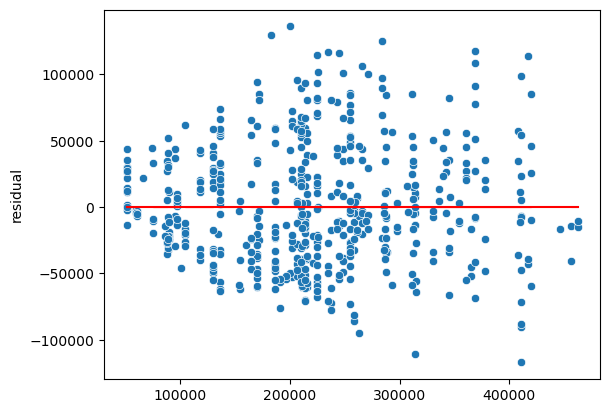

In [73]:
sns.scatterplot(data=df_residual,x=y_pred_xgb,y='residual')
sns.lineplot(data=df_residual,x=y_pred_xgb,y=0,color='red')

- grafik tersebut unbias dan heteroscedastic, di mana residual menjadi semakin menyebar untuk nilai prediksi yang lebih tinggi. Hal ini menunjukkan bahwa model memiliki kesulitan menjaga konsistensi akurasi untuk prediksi dengan nilai yang lebih besar

# Feature importance

In [74]:
transformer.fit(X_train)
transformer.get_feature_names_out()

array(['OHE__SubwayStation_1', 'OHE__SubwayStation_2',
       'OHE__SubwayStation_3', 'OHE__SubwayStation_4',
       'OHE__SubwayStation_5', 'OHE__SubwayStation_6',
       'OHE__SubwayStation_7', 'OHE__SubwayStation_8', 'ORD__HallwayType',
       'ORD__TimeToSubway', 'SS__N_FacilitiesNearBy(ETC)',
       'SS__N_FacilitiesNearBy(PublicOffice)',
       'SS__N_SchoolNearBy(University)', 'SS__N_Parkinglot(Basement)',
       'SS__N_FacilitiesInApt', 'SS__YearBuilt', 'RBS__Size(sqf)'],
      dtype=object)

In [75]:
best_model_xgb[-1].feature_importances_

array([0.00103339, 0.0009605 , 0.00164688, 0.00157177, 0.00155244,
       0.00122243, 0.0039208 , 0.00111178, 0.8034154 , 0.00695417,
       0.06166863, 0.00332816, 0.00598605, 0.03020866, 0.02327908,
       0.03252206, 0.01961783], dtype=float32)

<Axes: title={'center': 'Feature Importances'}>

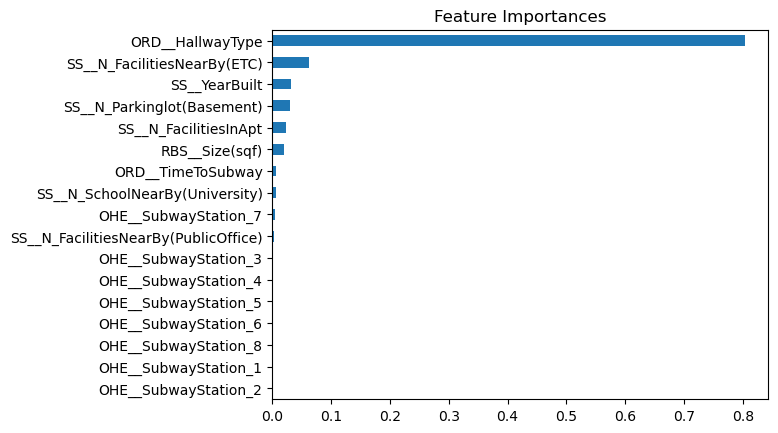

In [76]:
# Plot feature importances
feature_imp = pd.Series(best_model_xgb[-1].feature_importances_, transformer.get_feature_names_out()).sort_values()
feature_imp.plot(kind='barh', title='Feature Importances')

- Jenis lorong adalah faktor paling penting untuk model, dengan fitur lain memiliki impac yang jauh lebih kecil

# SHAP (Shapey Value of Explanations)

In [77]:
pip install shap

In [78]:
import shap 

In [79]:
xgb_only_tuned = best_model_xgb['modeling']
preprocessor_best = best_model_xgb['preprocessing']
preprocessor_best

ColumnTransformer(transformers=[('OHE', OneHotEncoder(), ['SubwayStation']),
                                ('ORD',
                                 OrdinalEncoder(cols=['HallwayType',
                                                      'TimeToSubway'],
                                                mapping=[{'col': 'HallwayType',
                                                          'data_type': dtype('O'),
                                                          'mapping': corrider    1
mixed       2
terraced    3
dtype: int64},
                                                         {'col': 'TimeToSubway',
                                                          'data_type': dtype('O'),
                                                          'mapping': no_bus_stop_nearby    0
15min~20min           1
10min~15min           2
5min~10min            3
0~5min                4
dtype: int64}]),
                                 ['HallwayType', 'TimeToSubway']),
                                ('SS', StandardScaler(),
                                 ['N_FacilitiesNearBy(ETC)',
                                  'N_FacilitiesNearBy(PublicOffice)',
                                  'N_SchoolNearBy(University)',
                                  'N_Parkinglot(Basement)', 'N_FacilitiesInApt',
                                  'YearBuilt']),
                                ('RBS', RobustScaler(), ['Size(sqf)'])])

In [80]:
features = preprocessor_best.get_feature_names_out()
features

array(['OHE__SubwayStation_1', 'OHE__SubwayStation_2',
       'OHE__SubwayStation_3', 'OHE__SubwayStation_4',
       'OHE__SubwayStation_5', 'OHE__SubwayStation_6',
       'OHE__SubwayStation_7', 'OHE__SubwayStation_8', 'ORD__HallwayType',
       'ORD__TimeToSubway', 'SS__N_FacilitiesNearBy(ETC)',
       'SS__N_FacilitiesNearBy(PublicOffice)',
       'SS__N_SchoolNearBy(University)', 'SS__N_Parkinglot(Basement)',
       'SS__N_FacilitiesInApt', 'SS__YearBuilt', 'RBS__Size(sqf)'],
      dtype=object)

In [81]:
explainer = shap.TreeExplainer(xgb_only_tuned)

In [82]:
X_transform = preprocessor_best.transform(X)
X_transform

array([[ 0.        ,  0.        ,  0.        , ...,  1.80425203,
         0.49847725,  1.17487685],
       [ 0.        ,  0.        ,  0.        , ..., -0.71188312,
        -1.78424526,  0.00985222],
       [ 0.        ,  0.        ,  0.        , ..., -0.29252726,
        -0.58853347, -0.86699507],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.96554031,
         0.60717832,  0.00985222],
       [ 0.        ,  1.        ,  0.        , ..., -0.71188312,
        -1.02333775,  1.33251232],
       [ 0.        ,  0.        ,  0.        , ..., -1.13123897,
        -1.89294633, -0.57635468]])

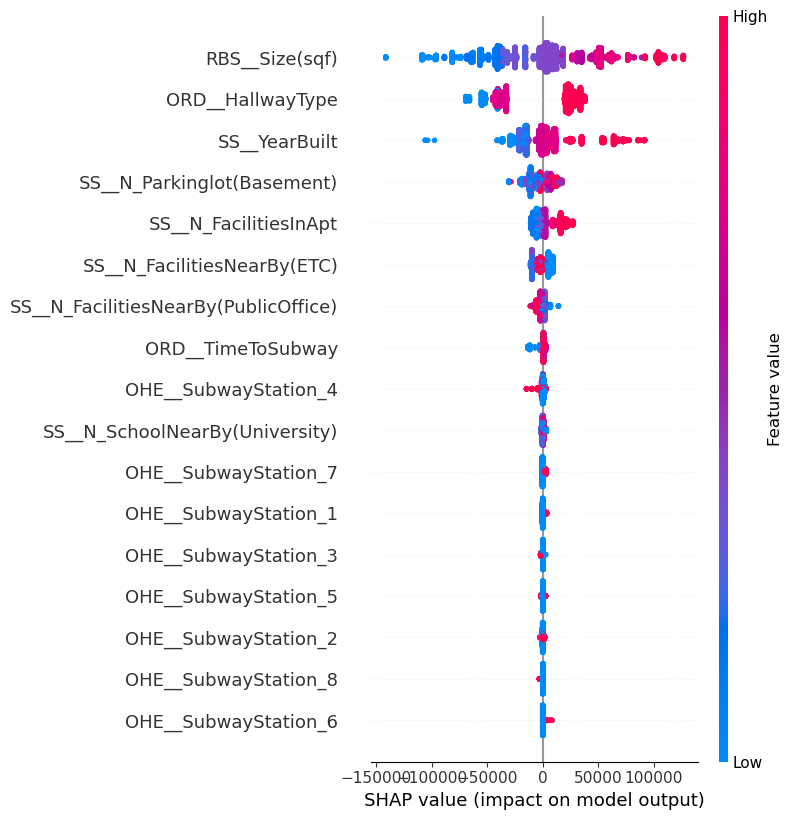

In [83]:
shap_values = explainer.shap_values(X_transform)
shap.summary_plot(shap_values, X_transform, feature_names=features)
plt.show()

- Berdasarkan diagram SHAP, fitur dengan dampak terbesar terhadap output model adalah "RBS__Size(sqf)", menunjukkan bahwa ukuran properti memiliki pengaruh signifikan terhadap prediksi, diikuti oleh "ORD__HallwayType" dan "SS__YearBuilt", dengan hubungan antara nilai fitur dan pengaruh model yang bervariasi dari positif hingga negatif.

# Model Limitation

In [89]:
from sklearn.metrics import mean_absolute_error

# Your code to create the data_y_pred DataFrame and list_ranges

data_y_pred = pd.DataFrame({'y_test': y_test, 'y_test_pred': y_pred_xgb})
data_y_pred.reset_index(drop=True, inplace=True)
data_y_pred.sort_values('y_test').head(20)

list_ranges = [
    ("<10000", 0, 10000),
    ("10001-20000", 10001, 20000),
    ("20001-30000", 20001, 30000),
    ("40001-50000", 40001, 50000),
    ("50001-60000", 50001, 60000),
    ("60001-70000", 60001, 70000),
    ("70001-80000", 70001, 80000),
    ("80001-90000", 80001, 90000),
    ("90001-100000", 90001, 100000),
    ("100001-150000", 110001, 120000),
    ("120001-130000", 120001, 130000),
    ("130001-140000", 130001, 140000),
    ("140001-150000", 140001, 150000),
    ("150001-200000", 150001, 200000),
    ("200001-250000", 200001, 250000),
    ("250001-300000", 250001, 300000),
    ("300001-350000", 300001, 350000),
    ("350001-400000", 350001, 400000),
    ("400001-450000", 400001, 450000),
    ("450001-500000", 450001, 500000),
    ("500001-550000", 500001, 550000),
    (">550000", 600001, float('inf')),
    ("All Range (Max 953000)", 0, float('inf'))
]


list_mae = []
list_mape = []
list_len = []

for range_name, min_value, max_value in list_ranges:
    range_data = data_y_pred[(data_y_pred['y_test'] > min_value) & (data_y_pred['y_test'] <= max_value)]

    if len(range_data) > 0:  # Check if there are data points in the current range
        score_mae = mean_absolute_error(range_data['y_test'], range_data['y_test_pred'])
        score_mape = mean_absolute_percentage_error(range_data['y_test'], range_data['y_test_pred'])
        len_data = len(range_data)

        list_mae.append(score_mae)
        list_mape.append(score_mape)
        list_len.append(len_data)
    else:
        list_mae.append(None)  # No data in the range, you can assign a placeholder value or None
        list_mape.append(None)
        list_len.append(0)

range_metrics = pd.DataFrame({
    "Range Count": [range_name for range_name, _, _ in list_ranges],
    "Score MAE": list_mae,
    "Score MAPE (%)": list_mape,
    "Jumlah Data": list_len
})

range_metrics

,Range Count,Score MAE,Score MAPE (%),Jumlah Data
0,<10000,NaN,NaN,0
1,10001-20000,NaN,NaN,0
2,20001-30000,NaN,NaN,0
3,40001-50000,2189.730469,0.044584,1
4,50001-60000,15497.888346,0.278844,12
5,60001-70000,20283.351807,0.311771,16
6,70001-80000,34404.770089,0.452297,14
7,80001-90000,27691.215666,0.327964,19
8,90001-100000,28486.093359,0.299851,10
9,100001-150000,43206.733665,0.376226,11


In [92]:
range_metrics.describe()

,Score MAE,Score MAPE (%),Jumlah Data
count,19.000000,19.000000,23.000000
mean,37921.158895,0.226771,45.173913
std,20262.788044,0.108204,108.295325
min,2189.730469,0.044584,0.000000
25%,28088.654513,0.138966,5.000000
50%,36181.216179,0.229882,14.000000
75%,41981.367321,0.305811,28.000000
max,99213.135417,0.452297,524.000000


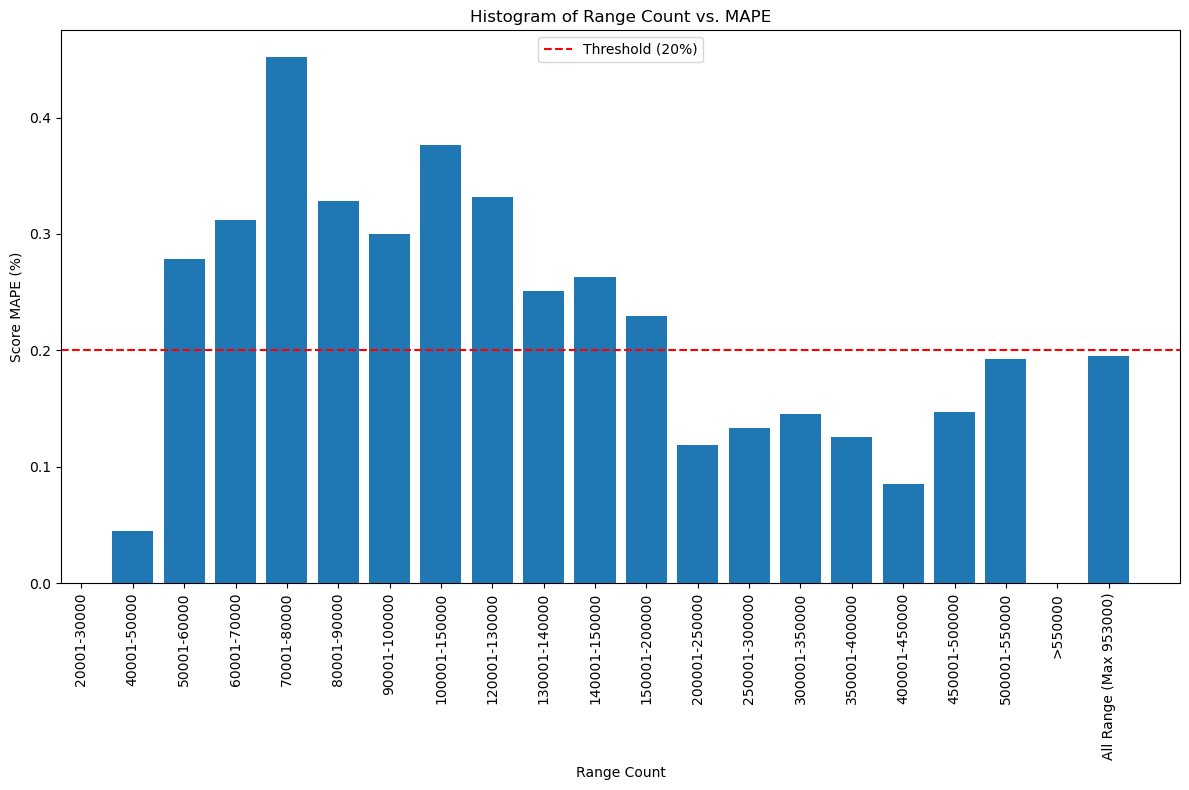

In [101]:
import matplotlib.pyplot as plt

# ... (your previous code)

# Plot histogram
plt.figure(figsize=(12, 8))
plt.bar(range_metrics["Range Count"], range_metrics["Score MAPE (%)"])
plt.xlabel("Range Count")
plt.ylabel("Score MAPE (%)")
plt.title("Histogram of Range Count vs. MAPE")
plt.xticks(rotation=90)

# Add a horizontal line at Y = 25
plt.axhline(y=0.20, color='red', linestyle='--', label='Threshold (20%)')

plt.tight_layout()
plt.legend()  # Show legend to indicate the threshold line
plt.show()

- berdasarkan grafik tersebut, dapat dijelaskan limitasi untuk model XGBoost ini dapat memprediksi harga dengan rentang mulai dari **200001 won sampai diatas 550000**, dimana pada rentang tersebut nilai MAPE berada di bawah 20%, yang mana akurasi MAPE tersebut masih dapat diterima. dikutip dari [ResearchGate](https://www.researchgate.net/figure/nterpretation-of-typical-MAPE-values_tbl1_257812432)

In [115]:
y_test_predict = y_test.tolist()

In [128]:
df_predict = pd.DataFrame(data=y_test_predict, columns=["y_test_pred"])
df_predict["Prediction"] = y_pred_xgb.tolist()

df_predict["Difference"] = abs(df_predict["y_test_pred"] - df_predict["Prediction"])
df_predict["Difference(%)"] = abs(df_predict["Difference"]/df_predict["y_test_pred"]*100)
df_predict.sort_values(by="Difference(%)", ascending=False)

,y_test_pred,Prediction,Difference,Difference(%)
513,73053,136410.218750,63357.218750,86.727744
353,54867,100574.703125,45707.703125,83.306365
274,74672,136410.218750,61738.218750,82.679209
223,75221,130213.070312,54992.070312,73.107337
43,79646,136410.218750,56764.218750,71.270646
...,...,...,...,...
65,286725,286140.718750,584.281250,0.203778
51,225663,225334.187500,328.812500,0.145710
453,51327,51304.730469,22.269531,0.043388
384,314159,314288.343750,129.343750,0.041171


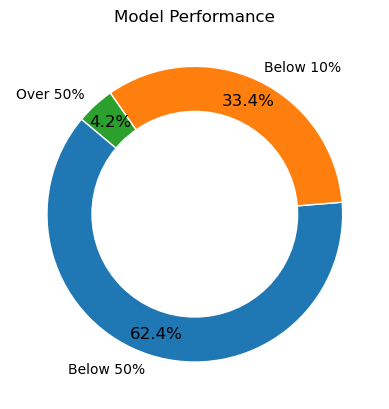

In [129]:
import matplotlib.pyplot as plt
import pandas as pd

# Buat kategori berdasarkan nilai Difference(%)
def categorize_error(diff):
    if diff > 50:
        return "Over 50%"
    elif diff > 10:
        return "Below 50%"
    else:
        return "Below 10%"

# Kategorikan data
df_predict["Category"] = df_predict["Difference(%)"].apply(categorize_error)

# Hitung jumlah setiap kategori
category_counts = df_predict["Category"].value_counts()

# Warna untuk setiap kategori # Blue, Orange, Green

# Buat grafik donut
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    category_counts, labels=category_counts.index, autopct='%1.1f%%',
    startangle=140, wedgeprops={'edgecolor': 'white'},
    pctdistance=0.85
)

# Tambahkan lingkaran tengah untuk efek donut
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Atur tampilan teks
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)

# Tambahkan judul
plt.title('Model Performance')

# Tampilkan plot
plt.show()


- Grafik diatas dibagi menjadi 3 kategori 
    1. Mayoritas Prediksi Memiliki Error < 50% :
        - 62.4% dari hasil prediksi memiliki error antara 10-50%
        - ini menunjukan bahwa sebagian besar prediksi tidak terlalu buruk, tetapi masih bisa tingkatkan
    2. Prediksi dengan Error Sangat Rendah (<10%) Cukup Banyak :
        - 33.4% dari hasil prediksi memiliki error dibawah 10%, yang berarti model cukup akurat
        - Ini adalah hal yang positif karena menunjukkan model memiliki beberapa prediksi yang sangat akurat
    3. Prediksi dengan Error > 50% Relatif Sedikit :
        - Hanya 4.2% dari hasil prediksi memiliki error di atas 50%, yang berarti model jarang memberikan hasil yang sangat buruk
        - Meskipun jumlahnya kecil, bagian ini tetap penting untuk dianalisis lebih lanjut, akan tetapi mengingat bahwa tidak ada model yang benar benar sempurna, maka persentase yang relatif sedikit ini dapat dimengerti 

# Conclussion 

Berdasarkan proses pemodelan yang sudah dilakukan, berikut kesimpulannya:

1. model terbaik pada proses modeling ini yang dapat digunakan untuk memprediksi harga sewa apartment adalah model CatBoost, RandomForest, XGBoost.
2. setelah dilakukannya hyperparameter dari ke-tiga model tersebut model yang terbaik ialah model XGBoost karena model tersebut mempunyai performa yang lebih baik pada metrik MAE, dan MAPE dibandingkan dengan metrik yang menggunakan model Catboost, dan RandomForest
3. model terbaik (XGBoost) memiliki MAPE senilai 19.4%, artinya model ini memiliki peluang maksimal untuk menyimpang sekitar 19.4% dari harga aslinya.
4. setelah dilakukannya pemodelan yang terbaik, terdapat 1 fitur yang paling mempengaruhi Sale_Price yaitu HallwayType, dan ada  5 fitur yang lumayan mempengaruhi Sale_Price yaitu Facilities_nearby, YearBuilt, ParkingLot, FacilitiesAPT, Size(sqf). dengan mengetahui feature yang paling mempengaruhi, diharapkan agen properti dapat menentukan harga sewa apartemen dengan akurat, dan juga mudah 
5. model XGBoost dapat memprediksi harga dari rentang 4001-5000, dan rentang 200001 sampai diatas 550000, dengan nilai MAPE dibawah 20% 

# Recommendation

ada beberapa rekomendasi untuk meningkatkan keakuratan dalam prediksi:

1. Menambahkan fitur baru seperti lantai apartemen, kondisi unit, fasilitas ruangan yang terdapat didalamnya (kamar mandi,dapur,dll.). 
2. Cobalah pendekatan transformasi data (misalnya, log-transformasi) untuk mengurangi heteroskedastisitas.
3. Memberikan fleksibilitas dalam skema sewa, seperti opsi sewa jangka pendek atau paket sewa yang mencakup layanan tambahan, agar lebih menarik bagi calon penyewa.
4. Membuat program membership untuk penyewa apartemen dengan berbagai tingkatan
    1. silver 
    2. gold 
    3. premium 
agar meningkatkan loyalitas penyewa apartemen
5. Fokus pada pembangunan atau peningkatan properti dengan lorong bertingkat dan tata letak modern.
6. Memprioritaskan proyek di dekat stasiun kereta bawah tanah (0-5 menit berjalan kaki) dan memastikan ketersediaan parkir untuk meningkatkan nilai properti.

# Save

In [85]:
import pickle
with open('prediction_price_daegu_apart.sav', 'wb') as file:
    pickle.dump(best_model_xgb, file)